In [1]:
import os
import math
import glob
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt 
import ktplotspy as kpy
import scipy.stats as stats

import matplotlib as mpl
from matplotlib import cm
import seaborn as sns
import textwrap

from cellphonedb.src.core.methods import cpdb_analysis_method
from cellphonedb.src.core.methods import cpdb_statistical_analysis_method

## Load marker genes

In [36]:
cellcycle_markers = pd.read_csv('/node200data/18parkky/datasets/reference/marker_genes/cell_cycle/cell_cycle_marker.tsv', sep='\t')
G2M_markers = list(cellcycle_markers[(cellcycle_markers['phase']=='G2/M')]['gene_symbol'])
S_markers   = list(cellcycle_markers[(cellcycle_markers['phase']=='S')]['gene_symbol'])

In [102]:
df_smillie_marker = pd.read_csv('/node200data/18parkky/datasets/reference/marker_genes/colon/Smillie_et_al/colon_epithelial_marker.csv')

## Load scData

In [546]:
adata = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/SG1_KUL_combined/AuthorAdata/iCMS3.basicPreprocessing.annotated.NanoMnT_labeled.h5ad')

## MSI epithelial cell analysis

In [1135]:
adata_epithelial = adata[(adata.obs['cell.type']=='Epithelial') & (adata.obs['MSI_status']=='MSI')].copy()
adata_epithelial = adata_epithelial.raw.to_adata()
adata_epithelial.layers["scaled"] = sc.pp.scale(adata_epithelial, copy=True).X

sc.pp.highly_variable_genes(adata_epithelial, n_top_genes=2000, batch_key="dataset")
adata_epithelial.raw = adata_epithelial
adata_epithelial = adata_epithelial[:, adata_epithelial.var.highly_variable]
sc.tl.pca(adata_epithelial, svd_solver="arpack")
sc.pp.neighbors(adata_epithelial, n_pcs=20, use_rep='X_pca')
sc.tl.umap(adata_epithelial)
for res in [0.02, 0.1, 0.2, 0.3, 0.5, 1.0]:
    # print(res)
    sc.tl.leiden(
        adata_epithelial, key_added=f"leiden_res_{res:4.2f}", resolution=res, flavor="igraph"
    )
    
adata_tumor = adata[(adata.obs['cell_type_lvl1']=='Tumor') & (adata.obs['MSI_status']=='MSI')].copy()
adata_tumor = adata_tumor.raw.to_adata()
adata_tumor.layers["scaled"] = sc.pp.scale(adata_tumor, copy=True).X

sc.pp.highly_variable_genes(adata_tumor, n_top_genes=2000, batch_key="dataset")
adata_tumor.raw = adata_tumor
adata_tumor = adata_tumor[:, adata_tumor.var.highly_variable]
sc.tl.pca(adata_tumor, svd_solver="arpack")
sc.pp.neighbors(adata_tumor, n_pcs=20, use_rep='X_pca')
sc.tl.umap(adata_tumor)
for res in [0.02, 0.1, 0.2, 0.3, 0.5, 1.0]:
    # print(res)
    sc.tl.leiden(
        adata_tumor, key_added=f"leiden_res_{res:4.2f}", resolution=res, flavor="igraph"
    )

In [1162]:
sc.tl.score_genes(adata_epithelial, list(df_smillie_marker[df_smillie_marker['ident']=='E.Epithelial']['gene']), score_name='Epithelial_score')
sc.tl.score_genes(adata_epithelial, list(df_smillie_marker[df_smillie_marker['ident']=='Stem']['gene']), score_name='Stem_score')
sc.tl.score_genes(adata_epithelial, list(df_smillie_marker[df_smillie_marker['ident']=='Goblet']['gene']), score_name='Goblet_score')
sc.tl.score_genes(adata_epithelial, list(df_smillie_marker[df_smillie_marker['ident']=='Enterocytes']['gene']), score_name='Enterocyte_score')

       'RP11-680F8.1', 'CTD-2547H18.1', 'MIR194-2', 'HSPB3', 'CTB-175P5.4',
       'RP11-30P6.6', 'AC009014.3', 'AC011298.2', 'AC106876.2', 'RP11-35P15.1',
       'C3orf83', 'RP11-187E13.1', 'RP11-465B22.8', 'RP11-542M13.2',
       'RP11-297L17.2', 'RP11-395B7.2', 'LINC00035', 'MT1G', 'MT1E'],
      dtype='object')
       'RP11-84C10.4', 'C1orf95', 'RPS2', 'RPL3', 'RP11-219E7.4', 'RPS3A',
       'RPL5', 'RPSA', 'RP11-290L1.2', 'GYLTL1B', 'RPS6', 'RPL31', 'RPS4X',
       'RPS21', 'AP000344.3', 'RP11-760H22.2', 'RPS9', 'RPLP0', 'RPL14',
       'ATP5G1', 'RP11-435O5.2', 'RP11-519G16.5', 'HSPD1', 'MT1G', 'ADCK3',
       'MT1E', 'NGFRAP1', 'RPSAP58'],
      dtype='object')
       'CTD-2589M5.4', 'RP3-340N1.5', 'AGAP1-IT1', 'FAM101A', 'MT-RNR2',
       'MFSD4', 'RP11-665N17.4', 'RP11-48O20.4', 'RP11-845C23.2',
       'RP11-757F18.5', 'RP11-92K15.3', 'GAREM'],
      dtype='object')
       'RP11-125B21.2', 'PSORS1C3', 'C12orf36', 'RP11-426L16.3', 'SEPP1',
       'LINC00955', 'LINC00704', 'MIR4

In [1139]:
sc.tl.score_genes(adata_tumor, list(df_smillie_marker[df_smillie_marker['ident']=='E.Epithelial']['gene']), score_name='Epithelial_score')
sc.tl.score_genes(adata_tumor, list(df_smillie_marker[df_smillie_marker['ident']=='Stem']['gene']), score_name='Stem_score')
sc.tl.score_genes(adata_tumor, list(df_smillie_marker[df_smillie_marker['ident']=='Goblet']['gene']), score_name='Goblet_score')
sc.tl.score_genes(adata_tumor, list(df_smillie_marker[df_smillie_marker['ident']=='Enterocytes']['gene']), score_name='Enterocyte_score')

       'RP11-680F8.1', 'CTD-2547H18.1', 'MIR194-2', 'HSPB3', 'CTB-175P5.4',
       'RP11-30P6.6', 'AC009014.3', 'AC011298.2', 'AC106876.2', 'RP11-35P15.1',
       'C3orf83', 'RP11-187E13.1', 'RP11-465B22.8', 'RP11-542M13.2',
       'RP11-297L17.2', 'RP11-395B7.2', 'LINC00035', 'MT1G', 'MT1E'],
      dtype='object')
       'RP11-84C10.4', 'C1orf95', 'RPS2', 'RPL3', 'RP11-219E7.4', 'RPS3A',
       'RPL5', 'RPSA', 'RP11-290L1.2', 'GYLTL1B', 'RPS6', 'RPL31', 'RPS4X',
       'RPS21', 'AP000344.3', 'RP11-760H22.2', 'RPS9', 'RPLP0', 'RPL14',
       'ATP5G1', 'RP11-435O5.2', 'RP11-519G16.5', 'HSPD1', 'MT1G', 'ADCK3',
       'MT1E', 'NGFRAP1', 'RPSAP58'],
      dtype='object')
       'CTD-2589M5.4', 'RP3-340N1.5', 'AGAP1-IT1', 'FAM101A', 'MT-RNR2',
       'MFSD4', 'RP11-665N17.4', 'RP11-48O20.4', 'RP11-845C23.2',
       'RP11-757F18.5', 'RP11-92K15.3', 'GAREM'],
      dtype='object')
       'RP11-125B21.2', 'PSORS1C3', 'C12orf36', 'RP11-426L16.3', 'SEPP1',
       'LINC00955', 'LINC00704', 'MIR4

In [1110]:
adata_epithelial = adata_epithelial.raw.to_adata()
adata_epithelial.layers["scaled"] = sc.pp.scale(adata_epithelial, copy=True).X

In [1193]:
list_ct_lvl3 = list()
for tup in adata_epithelial.obs.itertuples():
    if tup.cell_type_lvl1 == 'Tumor':
        list_ct_lvl3.append( f'{list(tup)[5]}_Tumor' )
    else:
        list_ct_lvl3.append( f'Normal epithelial' )
adata_epithelial.obs['cell_type_lvl3'] = list_ct_lvl3

In [ ]:
import os 
import subprocess

HRR_oi = [
    # P17-T-I (Pre)
    'HRR1373528',
    'HRR1373527',
    'HRR1373526',
    'HRR1373525',

    # P17-T-II (Post)
    'HRR1373552',
    'HRR1373551',
    'HRR1373550',
    'HRR1373549',
]

PATH_cellranger_bin = '/home/shared/program/cellranger-8.0.1/bin/cellranger'
PATH_cellranger_ref = '/home/shared/cellranger_reference/refdata-gex-GRCh38-2020-A'

sample_type = 'Tumor'

if sample_type == 'NAT':
    DIR_all_fastqs  = '/node200data/18parkky/datasets/data/public/FASTQ/Immunotherapy_CRC_Chen_et_al/MSI/Adjacent_normal_tissue'
elif sample_type == 'Tumor':
    DIR_all_fastqs  = '/node200data/18parkky/datasets/data/public/FASTQ/Immunotherapy_CRC_Chen_et_al/MSI/Tumor'
else:
    raise ValueError

for HRR in HRR_oi:
    print(HRR, flush=True)
    
    if os.path.exists( f'{DIR_all_fastqs}/{HRR}' ) == True:
        DIR_fastqs = f'{DIR_all_fastqs}/{HRR}'
    else:
        print(HRR, flush=True)
        raise ValueError
    
    cmd = f'{PATH_cellranger_bin} count --id {HRR} --transcriptome {PATH_cellranger_ref} --fastqs {DIR_fastqs} --create-bam true --output-dir {HRR}'
    subprocess.call(cmd, shell=True)

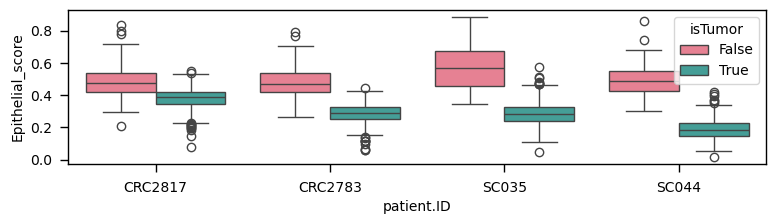

In [1210]:
with plt.rc_context({"figure.figsize": (9, 2), "figure.dpi": (100)}):
    #  sc.pl.violin(adata_tumor, 
    #               # stripplot=False, inner='box',
    #                 keys='Epithelial_score', 
    #                 groupby='patient.ID', palette='husl',
    #                 order=['Normal epithelial', 'CRC2817_Tumor', 'CRC2783_Tumor', 'SC035_Tumor', 'SC044_Tumor'],)
     
     sns.boxplot(adata_epithelial.obs, 
                  # stripplot=False, inner='box',
                    x='patient.ID', y='Epithelial_score',
                    palette='husl',
                    hue='isTumor', 
                    # split=True,
                    order=['CRC2817', 'CRC2783', 'SC035', 'SC044'],)

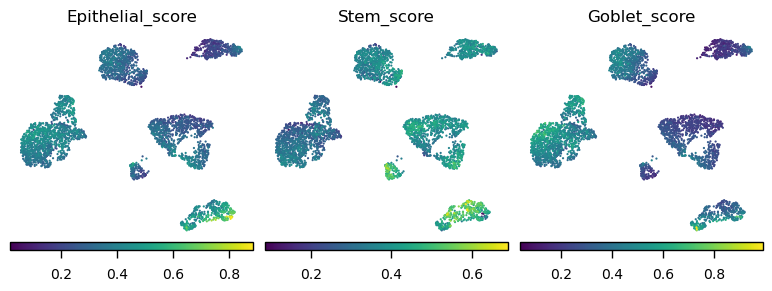

In [1174]:
with plt.rc_context({"figure.figsize": (3, 3), "figure.dpi": (100)}):
    sc.pl.umap(adata_epithelial, color=[ 'Epithelial_score', 'Stem_score', 'Goblet_score'], ncols=3, legend_loc='on_data', colorbar_loc='bottom', frameon=False, wspace=0.05, s=10)

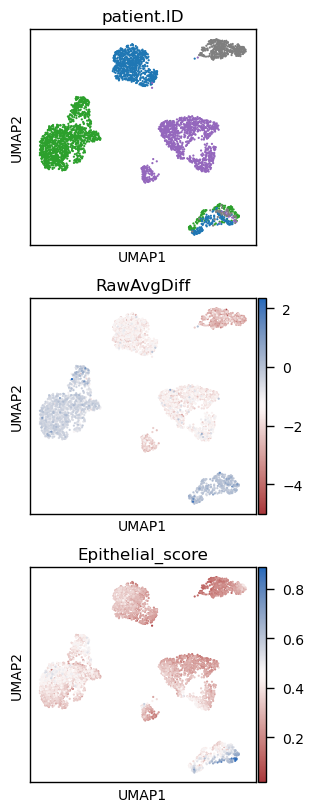

In [1164]:
with plt.rc_context({"figure.figsize": (3, 3), "figure.dpi": (100)}):
    sc.pl.umap(adata_epithelial, color=[ 'patient.ID','RawAvgDiff', 'Epithelial_score'], cmap='vlag_r', vmin=-4, vmax=4, ncols=1, legend_loc='on_data', wspace=0.05, s=10)

In [1079]:
adata_tumor = adata[(adata.obs['cell_type_lvl1']=='Tumor') & (adata.obs['MSI_status']=='MSI')].copy()
adata_tumor = adata_tumor.raw.to_adata()
adata_tumor.layers["scaled"] = sc.pp.scale(adata_tumor, copy=True).X

In [1080]:
dict_gene_oi = { 'MMR' : ['MLH1', 'MSH2', 'MSH6', 'PMS2'],
                          'DNA methylation' : ['DNMT3A', 'DNMT3B', 'DNMT1'],
                          'Antigen-presentation' : ['HLA-A', 'HLA-B', 'HLA-C', 'B2M',],
                          'Proliferation' : ['PCNA', 'MKI67'],
                          'Stemness' : ['LGR5', 'ASCL2', 'SOX2'],
                         }
for gene_group, genes in dict_gene_oi.items():
    sc.tl.score_genes( adata_tumor, genes, score_name=f'{gene_group}_score' )

In [1085]:
for gene_group in dict_gene_oi.keys():
    adata_tumor.obs[f'scaled_{gene_group}_score'] = stats.zscore( list(adata_tumor.obs[f'{gene_group}_score']) )


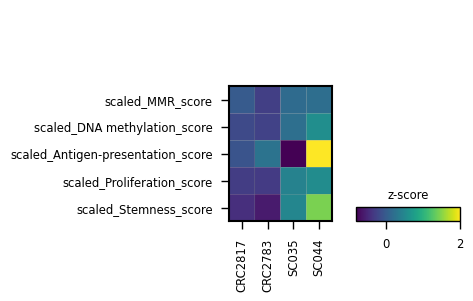

In [1086]:
sc.pl.matrixplot(adata_tumor, 
              var_names=[f'scaled_{e}_score' for e in list(dict_gene_oi.keys())], 
              groupby='patient.ID', layer='scaled', swap_axes=True, colorbar_title='z-score', 
            #   figsize=(4, 5),
              categories_order=['CRC2817', 'CRC2783', 'SC035', 'SC044'])

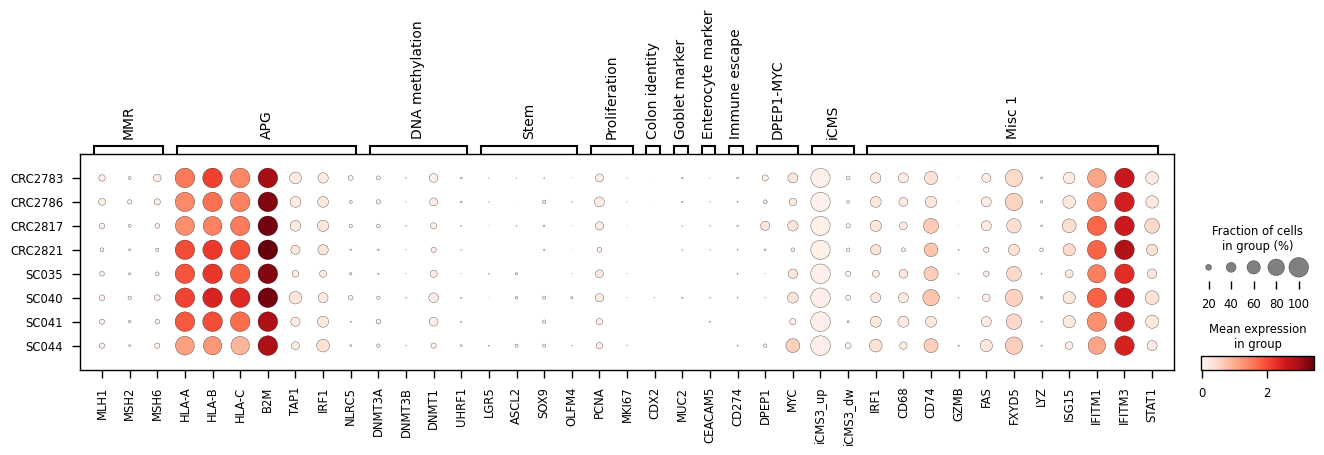

In [972]:
sc.pl.dotplot(adata[adata.obs['cell_type_lvl1']=='Fibroblast'], 
              var_names={'MMR' : ['MLH1', 'MSH2', 'MSH6'], 
                        'APG' : ['HLA-A', 'HLA-B', 'HLA-C', 'B2M', 'TAP1', 'IRF1', 'NLRC5'], 
                        'DNA methylation' :    ['DNMT3A', 'DNMT3B', 'DNMT1', 'UHRF1'],
                        'Stem' : ['LGR5', 'ASCL2', 'SOX9', 'OLFM4',], 
                        'Proliferation' : ['PCNA', 'MKI67'],
                        'Colon identity' : ['CDX2'],
                        'Goblet marker' : ['MUC2',],
                        'Enterocyte marker' : ['CEACAM5'],
                        'Immune escape' : ['CD274'],
                        'DPEP1-MYC' : ['DPEP1', 'MYC'],
                        'iCMS' : ['iCMS3_up', 'iCMS3_dw', ],
                        'Misc 1' : ['IRF1', 'CD68', 'CD74', "GZMB", 'FAS', 'FXYD5', 'LYZ', "ISG15", 'IFITM1', 'IFITM3', 'STAT1'],
                        }, 
              groupby='patient.ID',
              # categories_order=['CRC2817', 'CRC2783', 'SC035', 'SC044'],
              )

In [553]:
sc.tl.score_genes_cell_cycle(adata_epithelial, S_markers, G2M_markers)

In [549]:
dict_leiden_to_revised_ct = {
    '0' : 'Tumor',
    '1' : 'Tumor',
    '2' : 'Normal epithelial',
    '3' : 'Tumor',
    '4' : 'Tumor',
    '5' : 'Tumor',
    '6' : 'Tumor',
    '7' : 'Tumor',
}
adata_epithelial.obs['cell_type_lvl1'] = [ dict_leiden_to_revised_ct[l] for l in adata_epithelial.obs['leiden_res_0.30'] ]

In [554]:
for ident, edf in df_smillie_marker.groupby("ident"):
    sc.tl.score_genes( adata_epithelial, list(edf['gene']), score_name=f'{ident}_score' )

       'MT1E', 'LINC00694', 'MT1H', 'CTD-2319I12.1', 'MT1X', 'RP11-798K3.2',
       'MT1M', 'RP11-17M24.1', 'CASP16', 'RP11-416N2.4', 'RNA18S5', 'MT1F',
       'HSPB1'],
      dtype='object')
       'C18orf56', 'KIAA0101', 'MT3', 'LINC00669', 'CTB-175P5.4',
       'RP11-519G16.5', 'CTD-2090I13.1', 'AC009501.4'],
      dtype='object')
       'RP11-227H15.4', 'RP11-1220K2.2', 'C12orf36', 'LINC00955', 'LINC00704',
       'RP1-35C21.1', 'RP11-1399P15.1', 'RP11-798K3.2', 'GPR110', 'GPR115',
       'RP11-771K4.1', 'AC069277.2', 'RP11-48O20.4', 'LINC00035',
       'CTD-2228K2.5', 'MT1H'],
      dtype='object')
       'CTC-490G23.2', 'RP11-59E19.1', 'HSPB3', 'RP11-542M13.2', 'LINC00704',
       'RP1-35C21.1', 'CTD-2566J3.1', 'FAM132A', 'RP11-125B21.2',
       'RP11-800A18.4', 'CTD-2228K2.5', 'LINC00035', 'RP11-48O20.4',
       'RP11-30P6.6', 'MT1G', 'LL22NC03-32F9.1', 'RP11-511I2.2', 'MT1E',
       'AC011298.2', 'MT1H'],
      dtype='object')
       'RP11-680F8.1', 'CTD-2547H18.1', 'MIR194-2',

### Colon epithelial marker expression

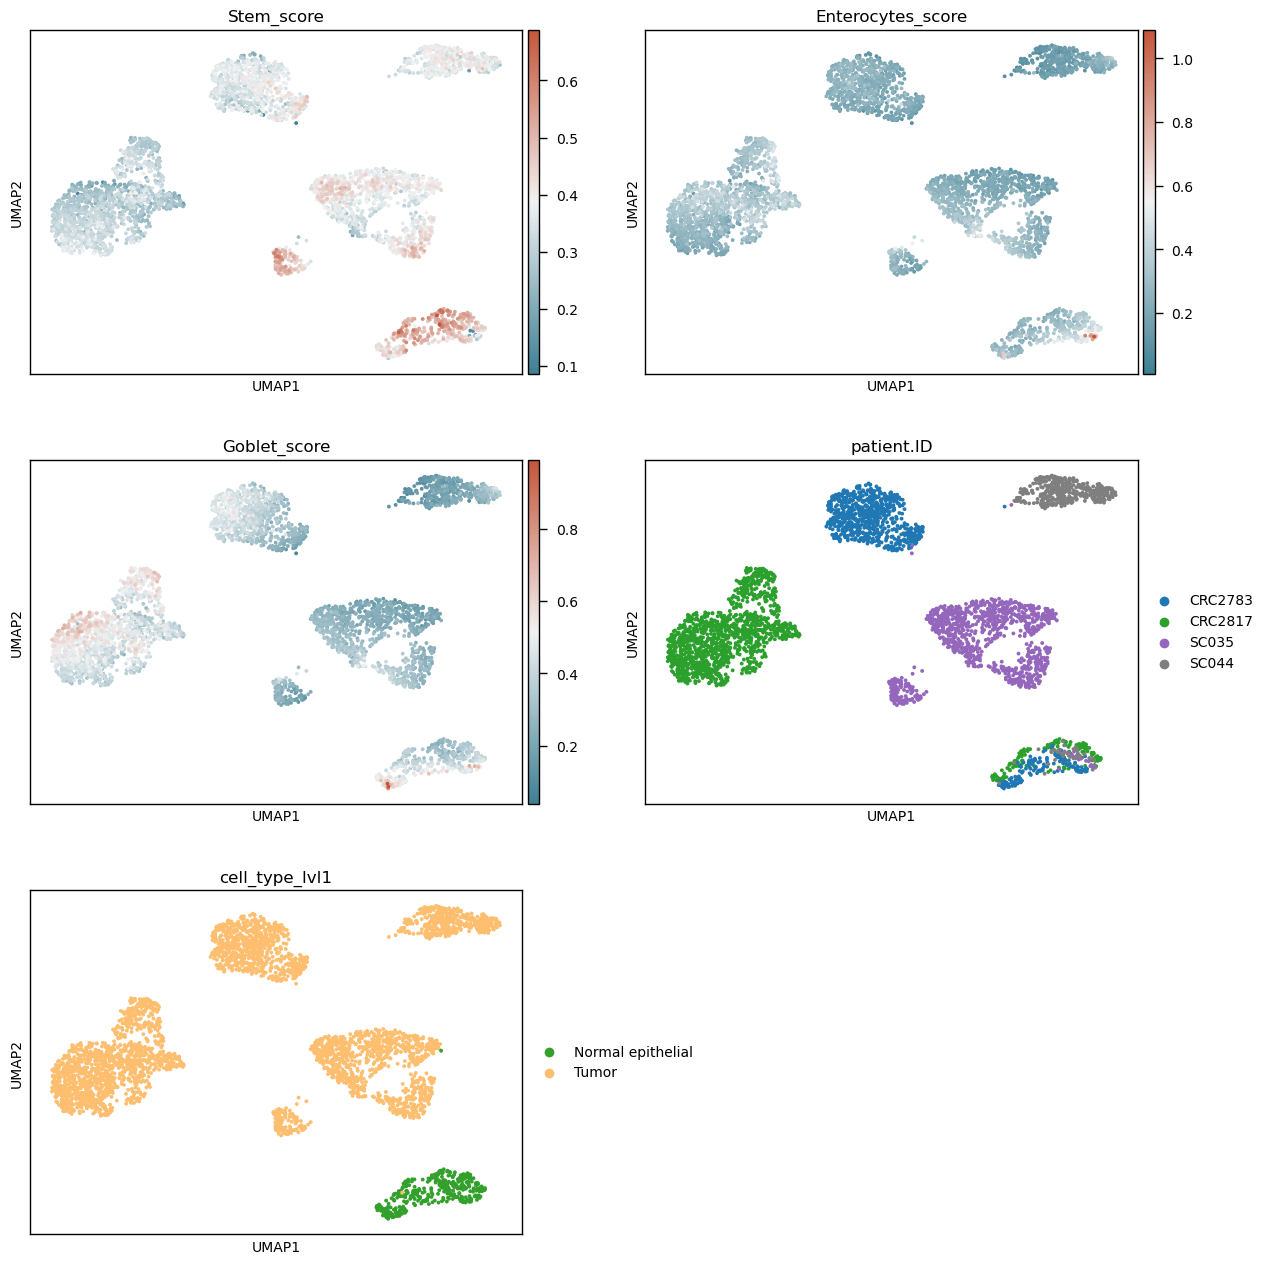

In [555]:
sc.pl.umap(adata_epithelial, color=['Stem_score', 'Enterocytes_score', 'Goblet_score', 'patient.ID', 'cell_type_lvl1'], cmap=sns.diverging_palette(220, 20, as_cmap=True,), ncols=2)

In [ ]:
adata_tumor = adata_epithelial[adata_epithelial.obs['cell_type_lvl1']=='Tumor'].copy()

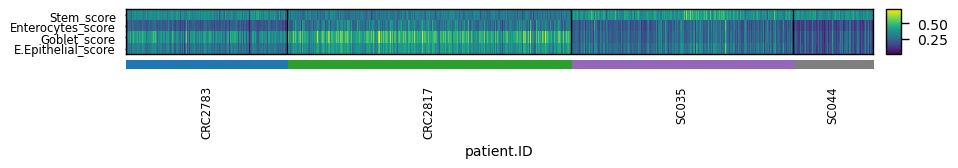

In [244]:
sc.pl.heatmap( adata_tumor, 
                 var_names=['Stem_score', 'Enterocytes_score', 'Goblet_score', 'E.Epithelial_score'], 
                 groupby='patient.ID', 
                 # categories_order=['CRC2817', 'CRC2783', 'SC035', 'SC044'], 
                 swap_axes=True,
                 )

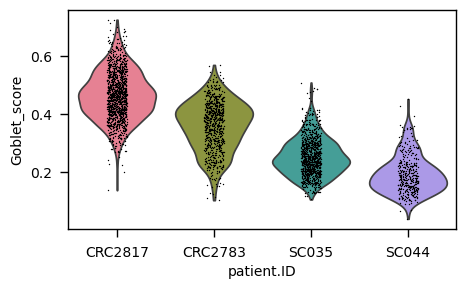

In [336]:
key_oi = 'Goblet_score' # E.Epithelial_score # RawAvgDiff
 
with plt.rc_context({"figure.figsize": (5, 3), "figure.dpi": (100)}):
    sc.pl.violin(adata_tumor, 
                 keys=key_oi, 
                 groupby='patient.ID', palette='husl',
                 order=['CRC2817', 'CRC2783', 'SC035', 'SC044'],)


In [326]:
adata_tumor.obs['scaled_E.Epithelial_score'] = stats.zscore( list(adata_tumor.obs['E.Epithelial_score']) )
adata_tumor.obs['scaled_Goblet_score'] = stats.zscore( list(adata_tumor.obs['Goblet_score']) )
adata_tumor.obs['scaled_Stem_score'] = stats.zscore( list(adata_tumor.obs['Stem_score']) )
adata_tumor.obs['scaled_RawAvgDiff'] = stats.zscore( list(adata_tumor.obs['RawAvgDiff']) )

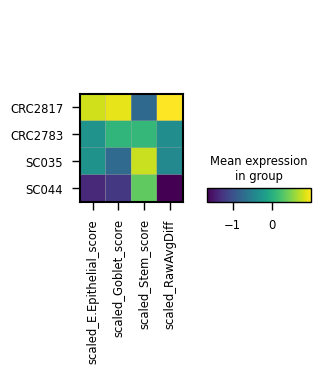

In [327]:
sc.pl.matrixplot(adata_tumor, 
                 var_names=['scaled_E.Epithelial_score', 'scaled_Goblet_score', 'scaled_Stem_score', 'scaled_RawAvgDiff'], 
                 groupby='patient.ID', 
                 categories_order=['CRC2817', 'CRC2783', 'SC035', 'SC044'], )

### Cell cycle prediction

#### Cell cycle scoring (patient-by-patient O)

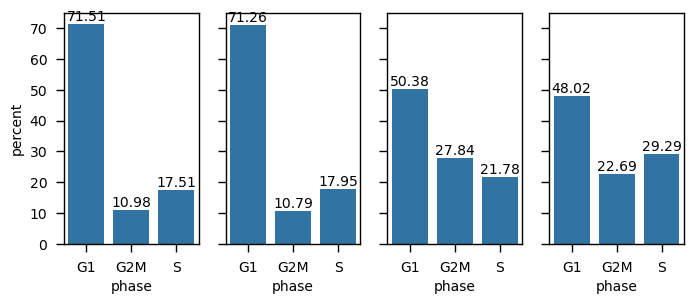

In [556]:
fig, axes = plt.subplots(1, 4, figsize=(8, 3), sharey=True, sharex=True)

list_S_scores_by_patient = list()

for idx, patient in enumerate(['CRC2817', 'CRC2783', 'SC035', 'SC044']):
    adata_tumor_oi = adata_tumor[adata_tumor.obs['patient.ID']==patient].copy()
    sc.tl.score_genes_cell_cycle(adata_tumor_oi, S_markers, G2M_markers)
    
    f = sns.countplot(data=adata_tumor_oi.obs, 
                x='phase', stat='percent', ax=axes[idx])
    f.bar_label(f.containers[0], fmt='%.2f');
    
    list_S_scores_by_patient.append( [patient, np.mean(adata_tumor_oi.obs['S_score']), np.mean(adata_tumor_oi[adata_tumor_oi.obs['phase']=='S'].obs['S_score']), len(adata_tumor_oi[adata_tumor_oi.obs['phase']=='S'])] )

<Axes: xlabel='avg_S_score_S_phase_cells', ylabel='patient'>

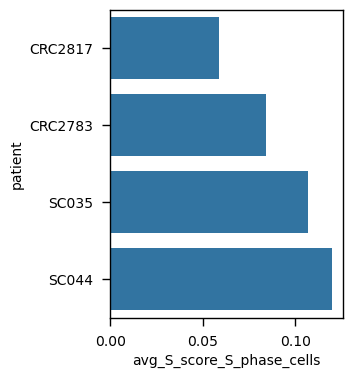

In [424]:
df_S_scores_by_patient = pd.DataFrame(list_S_scores_by_patient, columns=['patient', 'avg_S_score_all_cells', 'avg_S_score_S_phase_cells', 'num_S_phase_cells'])

plt.figure(figsize=(3, 4))
sns.barplot(data=df_S_scores_by_patient, y='patient', x='avg_S_score_S_phase_cells')

#### Cell cycle scoring (patient-by-patient X)

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(8, 3), sharey=True, sharex=True)
fig2, axes2 = plt.subplots(1, 4, figsize=(8, 3), sharey=True, sharex=True)

for idx, patient in enumerate(['CRC2817', 'CRC2783', 'SC035', 'SC044']):
    f = sns.countplot(data=adata_epithelial[(adata_epithelial.obs['isTumor']=='True') & 
                                            (adata_epithelial.obs['patient.ID']==patient)].obs, 
                x='phase', stat='percent', ax=axes[idx])
    f.bar_label(f.containers[0], fmt='%.0f');
    
    g = sns.barplot(data=adata_epithelial[(adata_epithelial.obs['isTumor']=='True') & 
                                            (adata_epithelial.obs['patient.ID']==patient)].obs, 
                x='phase', y = 'S_score', ax=axes2[idx], )

<Axes: xlabel='patient', ylabel='perc'>

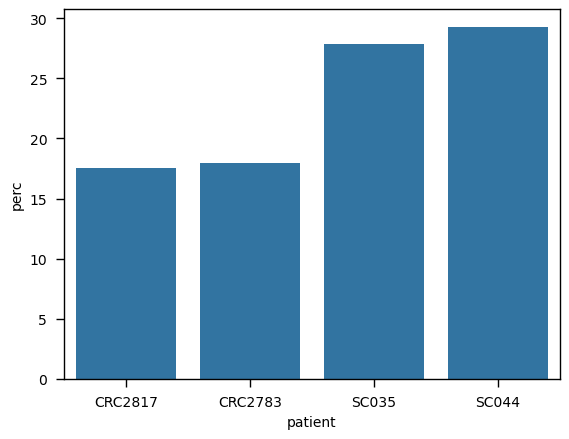

In [421]:
# Tumor
df_cellcycle_portion = pd.DataFrame([ 
 [ 'CRC2817', 71.51, 'G1' ], 
 [ 'CRC2817', 17.51, 'S' ],
 [ 'CRC2817', 10.98, 'G2M' ],
 
 [ 'CRC2783', 71.26, 'G1' ],
 [ 'CRC2783', 17.95, 'S' ],
 [ 'CRC2783', 10.79, 'G2M' ],

 [ 'SC035', 50.38, 'G1' ],
 [ 'SC035', 27.84, 'S' ],
 [ 'SC035', 21.78, 'G2M' ],

 [ 'SC044', 48.02, 'G1' ],
 [ 'SC044', 29.29, 'S' ],
 [ 'SC044', 22.69, 'G2M' ],
 ], )

# # Normal
# df_cellcycle_portion = pd.DataFrame([ 
#  [ 'CRC2817', 83, 'G1' ], 
#  [ 'CRC2817', 7, 'S' ],
#  [ 'CRC2817', 10, 'G2M' ],
 
#  [ 'CRC2783', 80, 'G1' ],
#  [ 'CRC2783', 6, 'S' ],
#  [ 'CRC2783', 14, 'G2M' ],

#  [ 'SC035', 55, 'G1' ],
#  [ 'SC035', 18, 'S' ],
#  [ 'SC035', 27, 'G2M' ],

#  [ 'SC044', 76, 'G1' ],
#  [ 'SC044', 13, 'S' ],
#  [ 'SC044', 11, 'G2M' ],
#  ], )

df_cellcycle_portion.columns = ['patient', 'perc', 'phase']
palette_e = sns.color_palette("rocket_r", 10)[2], sns.color_palette("rocket_r", 10)[4], sns.color_palette("rocket_r", 10)[7], sns.color_palette("rocket_r", 10)[9]
# palette_e = sns.color_palette("vlag")[0], sns.color_palette("vlag")[2], sns.color_palette("vlag")[-3], sns.color_palette("vlag")[-1]
# df_cellcycle_portion.sort_values("phase", inplace=True)

# plt.figure(figsize=(3, 5), dpi=200)
# f = sns.scatterplot(data=df_cellcycle_portion, x='phase', y='perc',  legend=None, hue='patient', palette=palette_e,)
# f = sns.lineplot(data=df_cellcycle_portion, x='phase', y='perc', legend=True, hue='patient', palette=palette_e, )

# f.set_xticklabels([]);
# f.set_yticklabels([]);
# f.set_xlabel("");
# f.set_ylabel("");
# f.tick_params(left=True, bottom=False);

# sns.move_legend(f, "lower center", bbox_to_anchor=(.5, 1), title='', ncols=1)
sns.barplot(data=df_cellcycle_portion[(df_cellcycle_portion['phase']=='S')], x='patient', y='perc')

### Intracellular tumor heterogeneity (gene expression)

In [1028]:
# adata_tumor_p1 = adata_tumor[adata_tumor.obs['patient.ID']=='CRC2783'].copy()
adata_tumor = adata[(adata.obs['cell_type_lvl1'].isin(['Tumor'])) & (adata.obs['MSI_status']=='MSI')].copy()
adata_tumor = adata_tumor.raw.to_adata()

sc.pp.highly_variable_genes(adata_tumor, n_top_genes=1000, batch_key="patient.ID")
adata_tumor.raw = adata_tumor
adata_tumor = adata_tumor[:, adata_tumor.var.highly_variable]

In [1029]:
# harmony_integratesc.external.pp.(adata_tumor, key='dataset')
# sc.pp.neighbors(adata_tumor, n_pcs=20, use_rep='X_pca_harmony')
sc.tl.pca(adata_tumor)
sc.pp.neighbors(adata_tumor, n_pcs=20, use_rep='X_pca')
sc.tl.umap(adata_tumor)
for res in [0.02, 0.1, 0.2, 0.3, 0.5, 1.0]:
    sc.tl.leiden(
        adata_tumor, key_added=f"leiden_res_{res:4.2f}", resolution=res, flavor="igraph"
    )

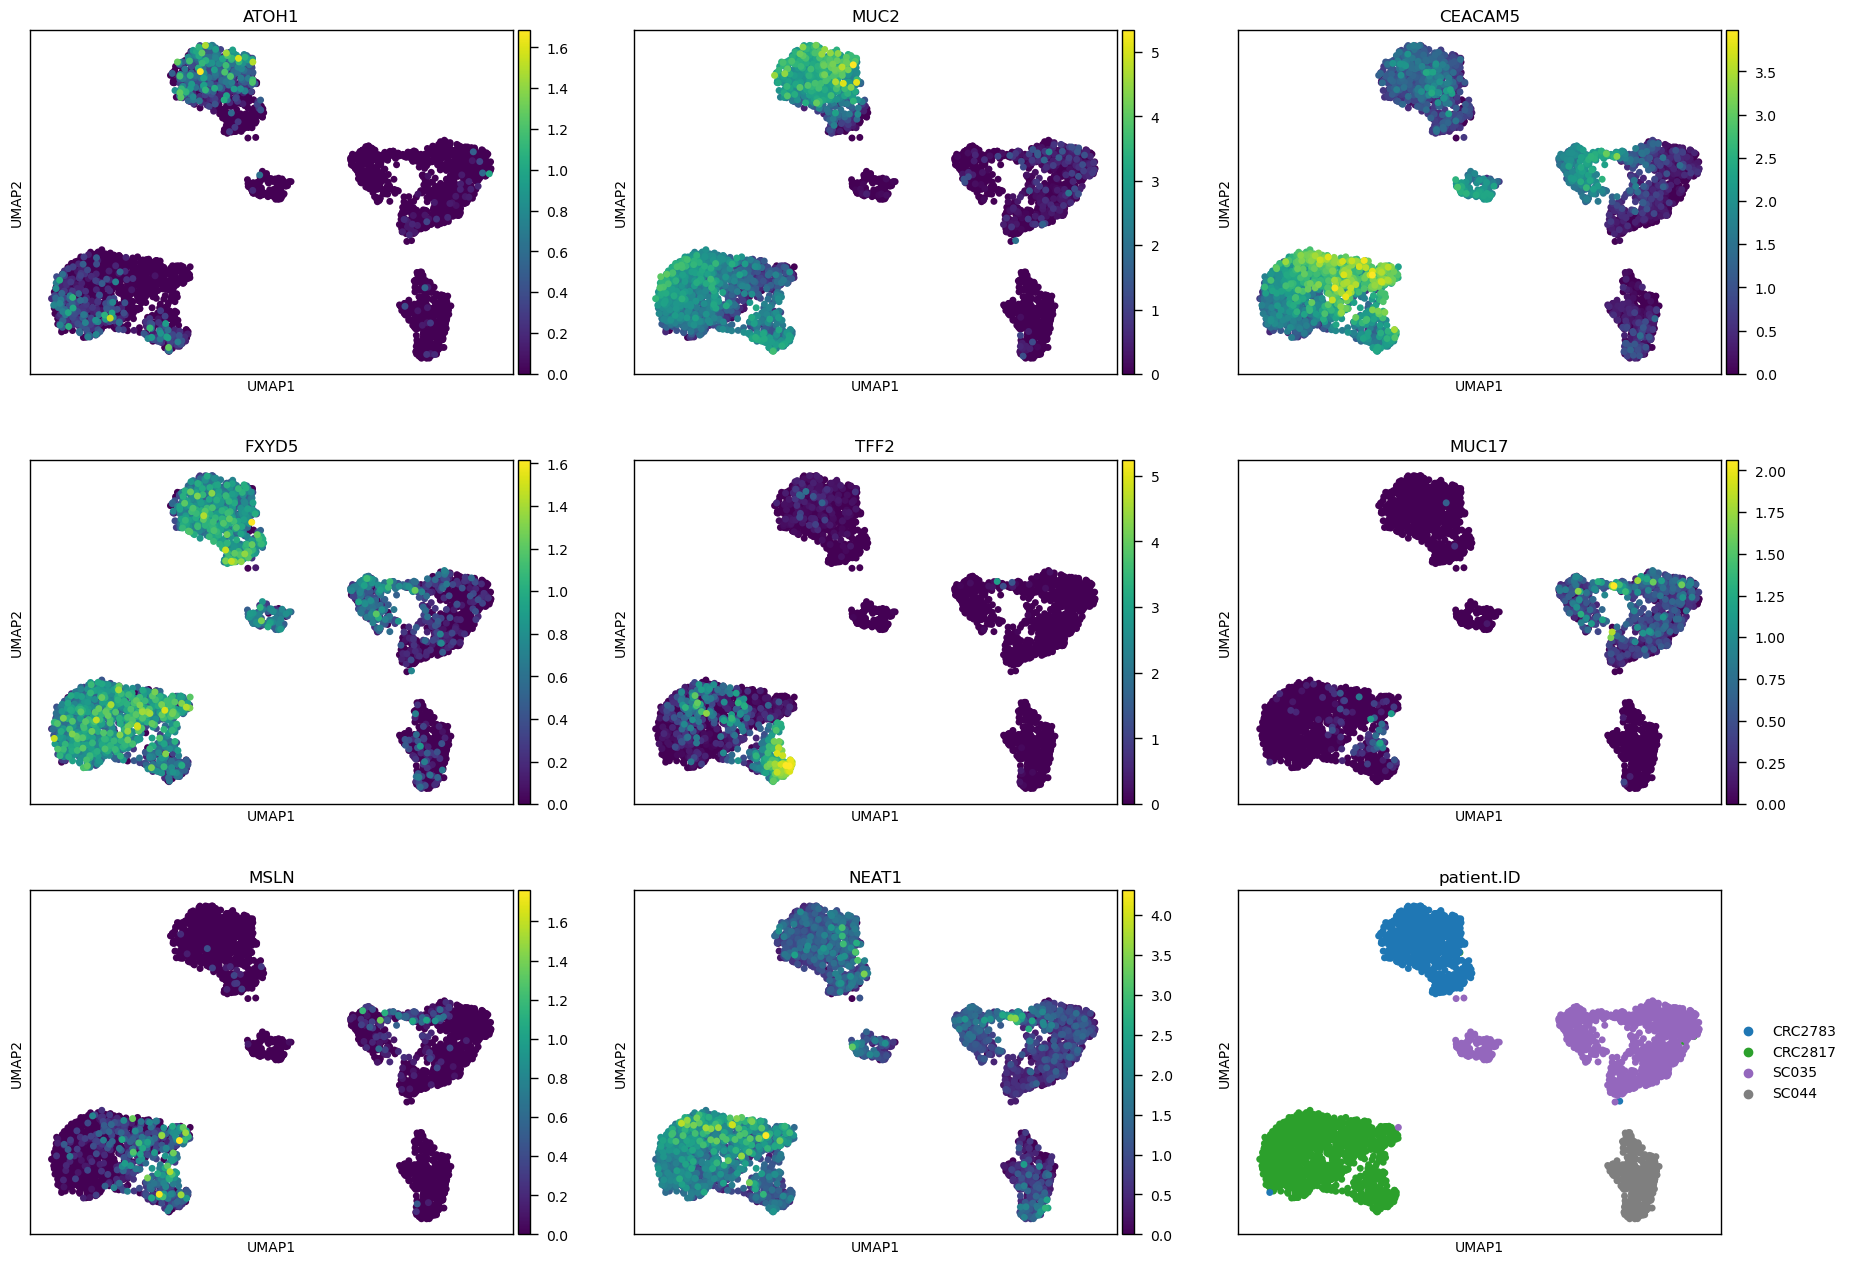

In [1033]:
sc.pl.umap(adata_tumor, color=['ATOH1', 'MUC2', 'CEACAM5', 'FXYD5', 'TFF2', 'MUC17' , 'MSLN', 'NEAT1', 'patient.ID'], s=100, ncols=3)

In [948]:
sc.pp.highly_variable_genes(adata_tumor_p1, n_top_genes=1000, batch_key="dataset")
adata_tumor_p1.raw = adata_tumor_p1
adata_tumor_p1 = adata_tumor_p1[:, adata_tumor_p1.var.highly_variable]
sc.tl.pca(adata_tumor_p1, svd_solver="arpack")
sc.pp.neighbors(adata_tumor_p1, n_pcs=20, use_rep='X_pca')
sc.tl.umap(adata_tumor_p1)
for res in [0.02, 0.1, 0.2, 0.3, 0.5, 1.0]:
    # print(res)
    sc.tl.leiden(
        adata_tumor_p1, key_added=f"leiden_res_{res:4.2f}", resolution=res, flavor="igraph"
    )
    
# sc.tl.score_genes(adata_tumor_p1, ['LGR5'], score_name='LGR5_score')
# sc.tl.score_genes(adata_tumor_p1, ['MUC2'], score_name='MUC2_score')
# sc.tl.score_genes(adata_tumor_p1, df_smillie_marker[df_smillie_marker['ident']=='Stem']['gene'], score_name='Stem_score')

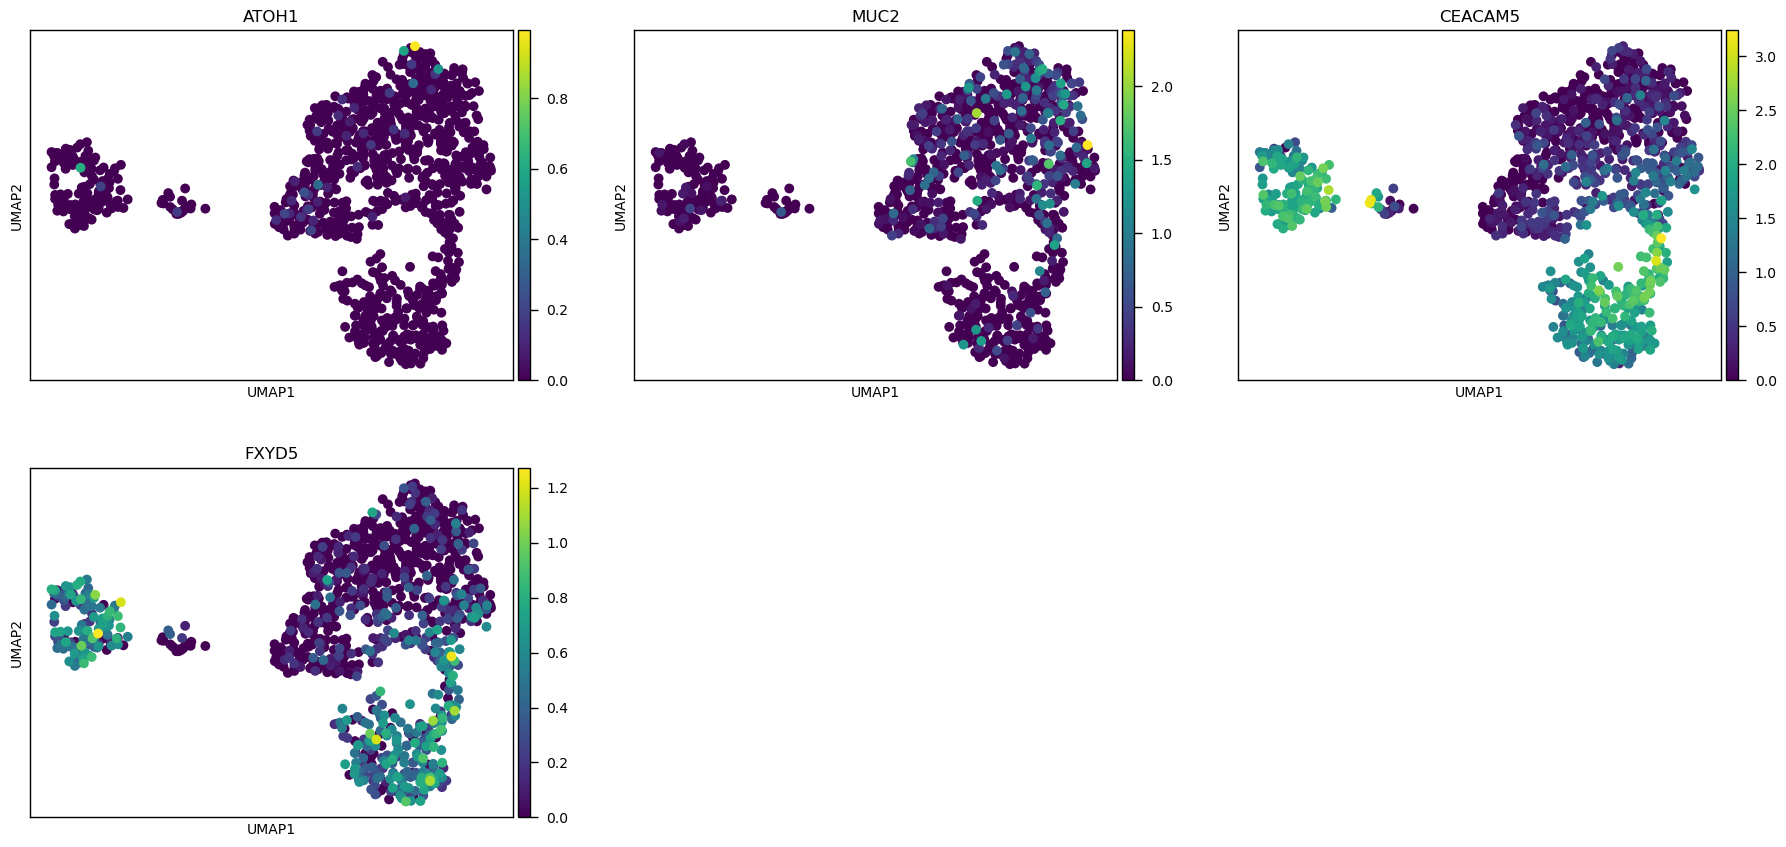

In [1023]:
sc.pl.umap(adata_tumor_p1, color=['ATOH1', 'MUC2', 'CEACAM5', 'FXYD5'], s=200, ncols=3)

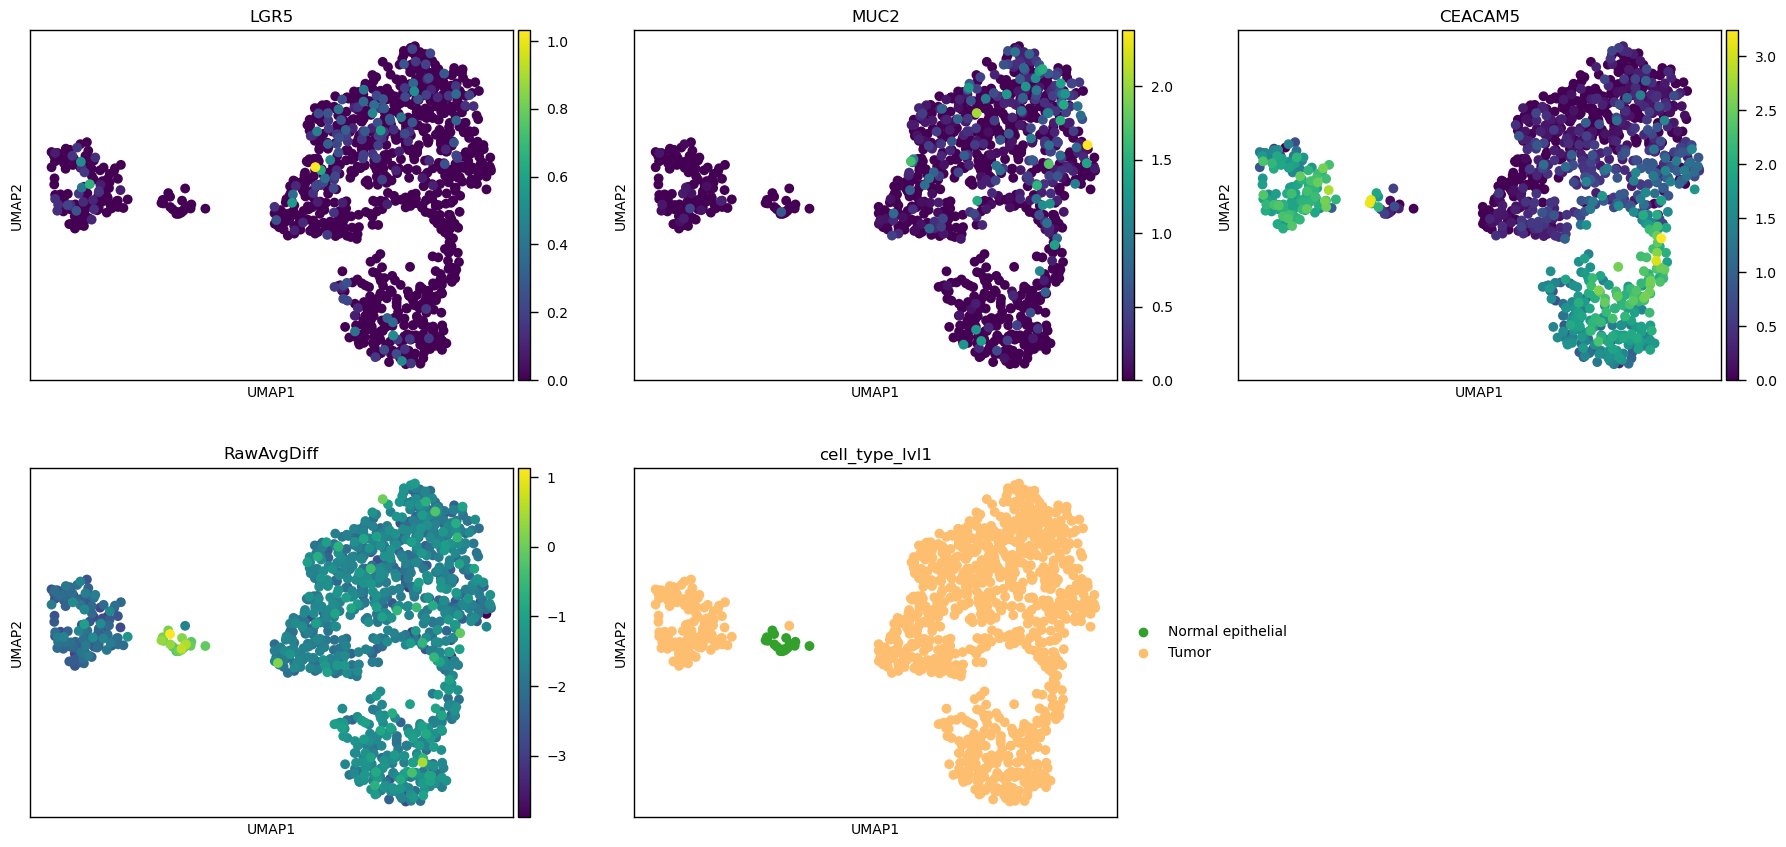

In [950]:
sc.pl.umap(adata_tumor_p1[(adata_tumor_p1.obs['RawSTRn']>=10)], color=['LGR5', 'MUC2', 'CEACAM5', 'RawAvgDiff', 'cell_type_lvl1'], s=200, ncols=3)

### SC035

In [903]:
# adata_tumor_p1 = adata_tumor[adata_tumor.obs['patient.ID']=='CRC2783'].copy()
adata_tumor_p1 = adata[(adata.obs['patient.ID']=='SC035') & (adata.obs['cell_type_lvl1']=='Tumor')].copy()
adata_tumor_p1 = adata_tumor_p1.raw.to_adata()
adata_tumor_p1.layers["scaled"] = sc.pp.scale(adata_tumor_p1, copy=True).X

sc.pp.highly_variable_genes(adata_tumor_p1, n_top_genes=1000, batch_key="dataset")
adata_tumor_p1.raw = adata_tumor_p1
adata_tumor_p1 = adata_tumor_p1[:, adata_tumor_p1.var.highly_variable]
sc.tl.pca(adata_tumor_p1, svd_solver="arpack")
sc.pp.neighbors(adata_tumor_p1, n_pcs=20, use_rep='X_pca')
sc.tl.umap(adata_tumor_p1)
for res in [0.02, 0.1, 0.2, 0.3, 0.5, 1.0]:
    # print(res)
    sc.tl.leiden(
        adata_tumor_p1, key_added=f"leiden_res_{res:4.2f}", resolution=res, flavor="igraph"
    )

In [904]:
sc.tl.rank_genes_groups( adata_tumor_p1, groupby='leiden_res_0.20', method='wilcoxon' )

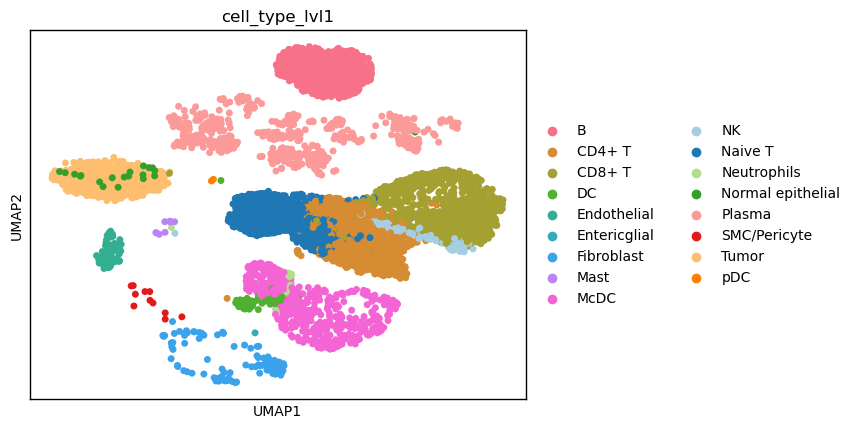

In [899]:
sc.pl.umap(adata[adata.obs['patient.ID']=='SC035'], color=['cell_type_lvl1'],  s=100, cmap='vlag_r')

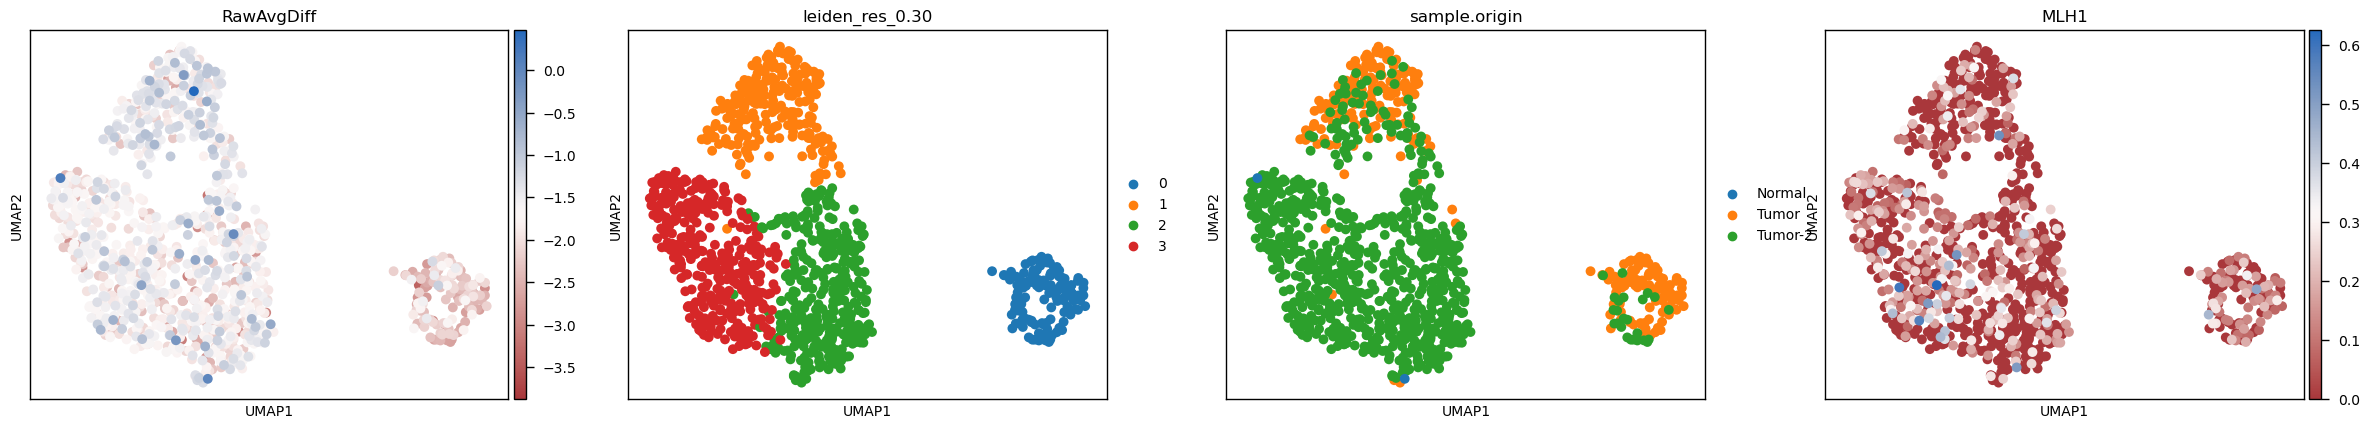

In [906]:
sc.pl.umap(adata_tumor_p1[adata_tumor_p1.obs['RawSTRn']>=10], color=['RawAvgDiff', 'leiden_res_0.30', 'sample.origin', 'MLH1'],  s=200, cmap='vlag_r')

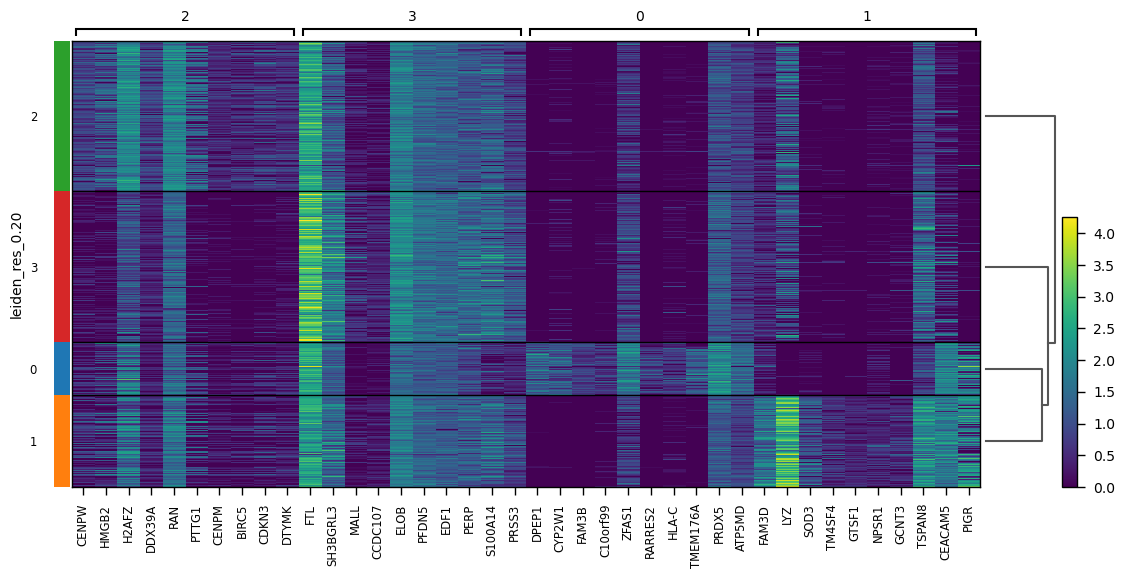

In [804]:
sc.pl.rank_genes_groups_heatmap( adata_tumor_p1, groupby='leiden_res_0.20' )

In [907]:
sc.tl.score_genes(adata_tumor_p1, df_smillie_marker[df_smillie_marker['ident']=='Stem']['gene'], score_name='Stem_score')
sc.tl.score_genes(adata_tumor_p1, df_smillie_marker[df_smillie_marker['ident']=='Goblet']['gene'], score_name='Goblet_score')
sc.tl.score_genes(adata_tumor_p1, df_smillie_marker[df_smillie_marker['ident']=='Enterocytes']['gene'], score_name='Enterocytes_score')

       'RP11-84C10.4', 'C1orf95', 'RPS2', 'RPL3', 'RP11-219E7.4', 'RPS3A',
       'RPL5', 'RPSA', 'RP11-290L1.2', 'GYLTL1B', 'RPS6', 'RPL31', 'RPS4X',
       'RPS21', 'AP000344.3', 'RP11-760H22.2', 'RPS9', 'RPLP0', 'RPL14',
       'ATP5G1', 'RP11-435O5.2', 'RP11-519G16.5', 'HSPD1', 'MT1G', 'ADCK3',
       'MT1E', 'NGFRAP1', 'RPSAP58'],
      dtype='object')
       'CTD-2589M5.4', 'RP3-340N1.5', 'AGAP1-IT1', 'FAM101A', 'MT-RNR2',
       'MFSD4', 'RP11-665N17.4', 'RP11-48O20.4', 'RP11-845C23.2',
       'RP11-757F18.5', 'RP11-92K15.3', 'GAREM'],
      dtype='object')
       'RP11-125B21.2', 'PSORS1C3', 'C12orf36', 'RP11-426L16.3', 'SEPP1',
       'LINC00955', 'LINC00704', 'MIR4435-1HG', 'CTC-490G23.2', 'LINC00035',
       'GPR110', 'C1orf106', 'RP11-202A13.1', 'CTB-171A8.1', 'RP11-35P15.1',
       'RP11-30P6.6', 'RP11-542M13.2'],
      dtype='object')


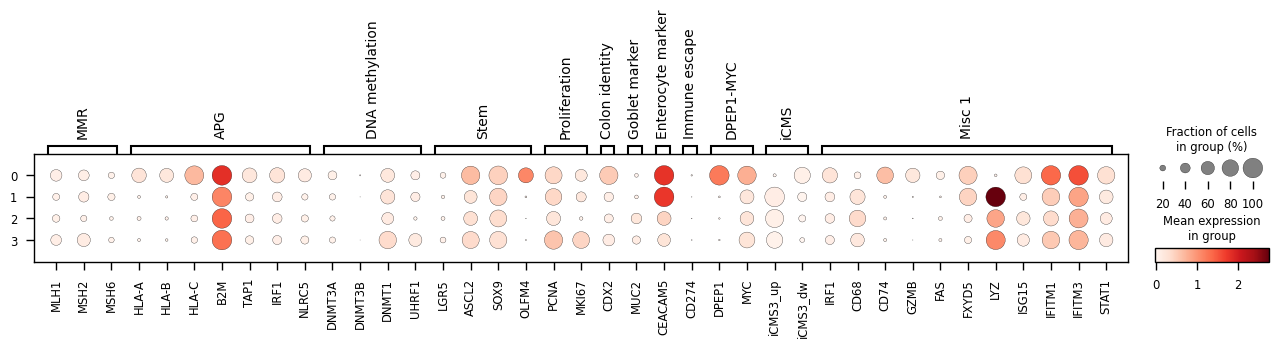

In [913]:
sc.pl.dotplot(adata_tumor_p1, var_names={'MMR' : ['MLH1', 'MSH2', 'MSH6'], 
                                         'APG' : ['HLA-A', 'HLA-B', 'HLA-C', 'B2M', 'TAP1', 'IRF1', 'NLRC5'], 
                                         'DNA methylation' :    ['DNMT3A', 'DNMT3B', 'DNMT1', 'UHRF1'],
                                         'Stem' : ['LGR5', 'ASCL2', 'SOX9', 'OLFM4',], 
                                         'Proliferation' : ['PCNA', 'MKI67'],
                                         'Colon identity' : ['CDX2'],
                                         'Goblet marker' : ['MUC2',],
                                         'Enterocyte marker' : ['CEACAM5'],
                                         'Immune escape' : ['CD274'],
                                         'DPEP1-MYC' : ['DPEP1', 'MYC'],
                                         'iCMS' : ['iCMS3_up', 'iCMS3_dw', ],
                                         'Misc 1' : ['IRF1', 'CD68', 'CD74', "GZMB", 'FAS', 'FXYD5', 'LYZ', "ISG15", 'IFITM1', 'IFITM3', 'STAT1'],
                                         },
              groupby='leiden_res_0.30') 


In [868]:
for g in adata.raw.to_adata().var.index:
    if 'HLA' in g[:3]:
        print(g)

HLA-F
HLA-G
HLA-A
HLA-E
HLA-C
HLA-B
HLA-DRA
HLA-DRB5
HLA-DRB1
HLA-DQA1
HLA-DQB1
HLA-DQB1-AS1
HLA-DQA2
HLA-DQB2
HLA-DOB
HLA-DMB
HLA-DMA
HLA-DOA
HLA-DPA1
HLA-DPB1


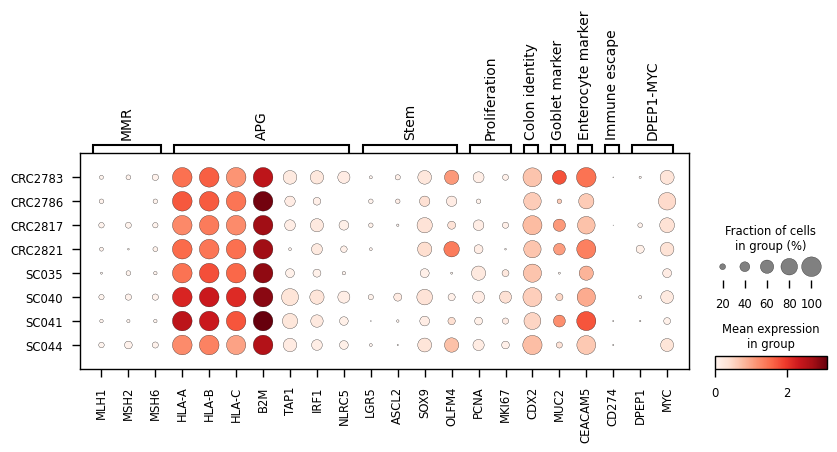

In [784]:
sc.pl.dotplot(adata[adata.obs['cell_type_lvl1']=='Normal epithelial'], var_names={'MMR' : ['MLH1', 'MSH2', 'MSH6'], 
                                         'APG' : ['HLA-A', 'HLA-B', 'HLA-C', 'B2M', 'TAP1', 'IRF1', 'NLRC5'], 
                                         'Stem' : ['LGR5', 'ASCL2', 'SOX9', 'OLFM4',], 
                                         'Proliferation' : ['PCNA', 'MKI67'],
                                         'Colon identity' : ['CDX2'],
                                         'Goblet marker' : ['MUC2',],
                                         'Enterocyte marker' : ['CEACAM5'],
                                         'Immune escape' : ['CD274'],
                                         'DPEP1-MYC' : ['DPEP1', 'MYC']
                                         }, 
              groupby='patient.ID')

In [709]:
a = set(df_smillie_marker[df_smillie_marker['ident']=='Enterocytes']['gene'])
b = set(df_smillie_marker[df_smillie_marker['ident']=='Enterocyte Progenitors']['gene'])
len(a), len(b), len(a.intersection(b))

(167, 114, 35)

       'RP11-84C10.4', 'C1orf95', 'RPS2', 'RPL3', 'RP11-219E7.4', 'RPS3A',
       'RPL5', 'RPSA', 'RP11-290L1.2', 'GYLTL1B', 'RPS6', 'RPL31', 'RPS4X',
       'RPS21', 'AP000344.3', 'RP11-760H22.2', 'RPS9', 'RPLP0', 'RPL14',
       'ATP5G1', 'RP11-435O5.2', 'RP11-519G16.5', 'HSPD1', 'MT1G', 'ADCK3',
       'MT1E', 'NGFRAP1', 'RPSAP58'],
      dtype='object')
       'CTD-2589M5.4', 'RP3-340N1.5', 'AGAP1-IT1', 'FAM101A', 'MT-RNR2',
       'MFSD4', 'RP11-665N17.4', 'RP11-48O20.4', 'RP11-845C23.2',
       'RP11-757F18.5', 'RP11-92K15.3', 'GAREM'],
      dtype='object')
       'RP11-125B21.2', 'PSORS1C3', 'C12orf36', 'RP11-426L16.3', 'SEPP1',
       'LINC00955', 'LINC00704', 'MIR4435-1HG', 'CTC-490G23.2', 'LINC00035',
       'GPR110', 'C1orf106', 'RP11-202A13.1', 'CTB-171A8.1', 'RP11-35P15.1',
       'RP11-30P6.6', 'RP11-542M13.2'],
      dtype='object')


In [52]:
adata_tumor = adata[(adata.obs['cell_type_lvl1']=='Tumor') & (adata.obs['MSI_status']=='MSI')].copy()
adata_tumor = adata_tumor.raw.to_adata()

In [ ]:
sc.tl.rank_genes_groups( adata_tumor, groupby='patient.ID', method='wilcoxon' )
adata_tumor.layers["scaled"] = sc.pp.scale(adata_tumor, copy=True).X

In [ ]:
sc.pl.rank_genes_groups_heatmap(
    adata_tumor,
    n_genes=8,
    use_raw=False,
    swap_axes=True,
    vmin=-4,
    vmax=4,
    cmap=sns.diverging_palette(220, 20, as_cmap=True,),
    layer="scaled",
    figsize=(6, 8),
    show=False,
);

In [ ]:
DEG_names           = adata_tumor.uns['rank_genes_groups']['names']
DEG_pvals_adj       = adata_tumor.uns['rank_genes_groups']['pvals_adj']
DEG_logfoldchanges  = adata_tumor.uns['rank_genes_groups']['logfoldchanges']
DEG_scores          = adata_tumor.uns['rank_genes_groups']['scores']

lfc_threshold       = 1
pvals_adj_threshold = 0.05

set_lfc_threshold_index = set()
set_pvals_adj_passed_index = set()

for idx, tup_lfc_change in enumerate(DEG_logfoldchanges):
    for jdx, lfc_change in enumerate(tup_lfc_change):
        if lfc_change >= lfc_threshold:
            set_lfc_threshold_index.add( (idx, jdx) )

for idx, tup_pvals_adj in enumerate(DEG_pvals_adj):
    for jdx, pvals_adj in enumerate(tup_pvals_adj):
        if pvals_adj <= pvals_adj_threshold:
            set_pvals_adj_passed_index.add( (idx, jdx) )
            
set_passed_gene_index = set_pvals_adj_passed_index.intersection( set_lfc_threshold_index )

dict_jdx_to_patient = { 0 : 'CRC2783', 1 : 'CRC2817', 2 : 'SC035', 3 : 'SC044' }

list_DEG = list()

for gene_index in set_passed_gene_index:
    
    idx = gene_index[0]
    jdx = gene_index[1] 
    
    list_DEG.append( [DEG_names[idx][jdx], dict_jdx_to_patient[jdx], DEG_pvals_adj[idx][jdx], DEG_logfoldchanges[idx][jdx], DEG_scores[idx][jdx] ] )
    
DEG = pd.DataFrame(list_DEG, columns=['gene_name', 'patient', 'pvals_adj', 'logfoldchanges', 'score'])

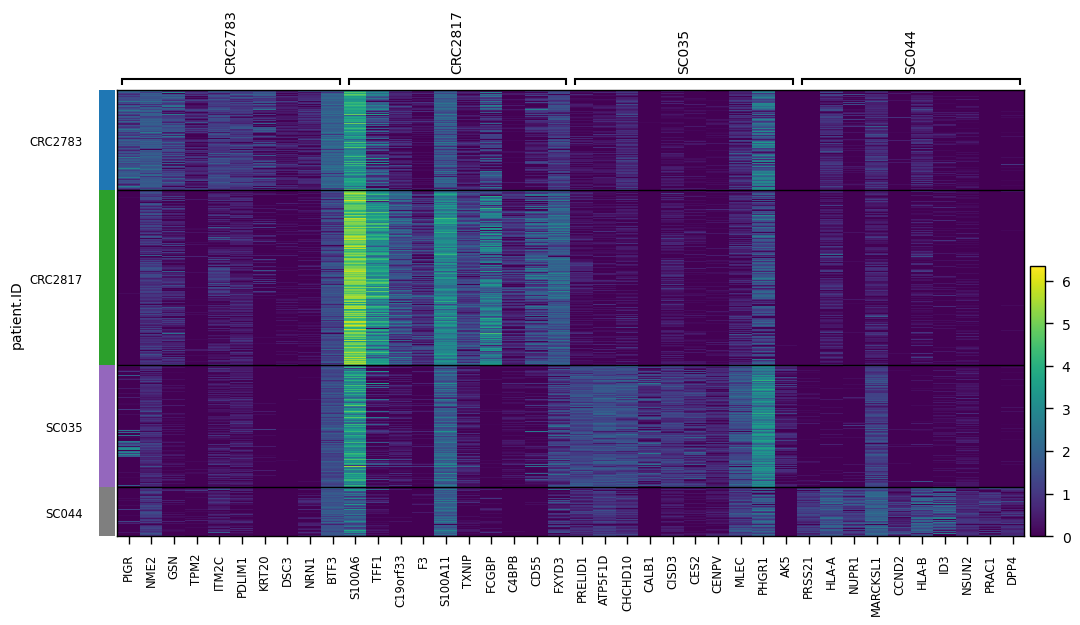

In [74]:
n_genes = 10
dict_patient_to_DEG = dict()
for patient, edf in DEG.groupby("patient"):
    dict_patient_to_DEG[patient] = list()
    for gene in edf.sort_values('score', ascending=False)[:n_genes]['gene_name']:
        dict_patient_to_DEG[patient].append(gene)
sc.pl.heatmap(adata_tumor, dict_patient_to_DEG, groupby='patient.ID', )

In [5]:
sc.pp.highly_variable_genes(adata_tumor, n_top_genes=2000, batch_key="dataset")
adata_tumor.raw = adata_tumor
adata_tumor = adata_tumor[:, adata_tumor.var.highly_variable]
sc.tl.pca(adata_tumor, svd_solver="arpack")
sc.pp.neighbors(adata_tumor, n_pcs=20, use_rep='X_pca')
sc.tl.umap(adata_tumor)

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
2024-10-15 14:40:30.533444: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-15 14:40:30.569353: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-15 14:40:31.050815: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-15 14:40:31.213296: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has

In [8]:
for res in [0.02, 0.1, 0.2, 0.3, 0.5, 1.0]:
    # print(res)
    sc.tl.leiden(
        adata_tumor, key_added=f"leiden_res_{res:4.2f}", resolution=res, flavor="igraph"
    )

In [37]:
sc.tl.score_genes(adata_tumor, 'MLH1')
sc.tl.score_genes_cell_cycle(adata_tumor, S_markers, G2M_markers)

### Various gene signature score (Joanito et al)

In [234]:
joanito_table2 = pd.read_csv(glob.glob(f'/node200data/18parkky/datasets/reference/marker_genes/colon/Joanito_et_al/Table2.*.csv')[0])
joanito_table3 = pd.read_csv(glob.glob(f'/node200data/18parkky/datasets/reference/marker_genes/colon/Joanito_et_al/Table3.*.csv')[0])
joanito_table4 = pd.read_csv(glob.glob(f'/node200data/18parkky/datasets/reference/marker_genes/colon/Joanito_et_al/Table4.*.csv')[0])
joanito_table5 = pd.read_csv(glob.glob(f'/node200data/18parkky/datasets/reference/marker_genes/colon/Joanito_et_al/Table5.*.csv')[0])
joanito_table6 = pd.read_csv(glob.glob(f'/node200data/18parkky/datasets/reference/marker_genes/colon/Joanito_et_al/Table6.*.csv')[0])
joanito_table7 = pd.read_csv(glob.glob(f'/node200data/18parkky/datasets/reference/marker_genes/colon/Joanito_et_al/Table7.*.csv')[0])
joanito_table8 = pd.read_csv(glob.glob(f'/node200data/18parkky/datasets/reference/marker_genes/colon/Joanito_et_al/Table8.*.csv')[0])
joanito_table9 = pd.read_csv(glob.glob(f'/node200data/18parkky/datasets/reference/marker_genes/colon/Joanito_et_al/Table9.*.csv')[0])

#### (1) Table 2: Curated GSEA-Hallmarks gene signatures

In [243]:
for pathway in joanito_table2.columns:
    hallmark_genes = list(joanito_table2[pathway].dropna())
    sc.tl.score_genes( adata_tumor, hallmark_genes, score_name=pathway )

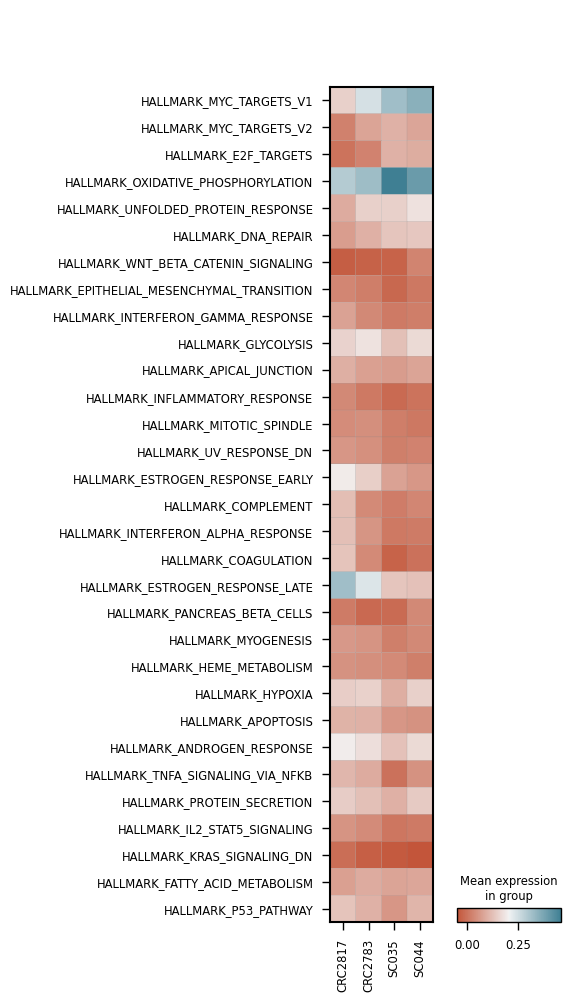

In [724]:
sc.pl.matrixplot(adata_tumor, 
              var_names = list(joanito_table2.columns), 
              groupby='patient.ID', 
              categories_order=['CRC2817', 'CRC2783', 'SC035', 'SC044'], 
              cmap=sns.diverging_palette(20, 220, as_cmap=True),
              swap_axes=True)

#### (2) Table 3: Curated GSEA-KEGG gene signatures

In [251]:
for pathway in joanito_table3.columns:
    hallmark_genes = list(joanito_table3[pathway].dropna())
    sc.tl.score_genes( adata_tumor, hallmark_genes, score_name=pathway )

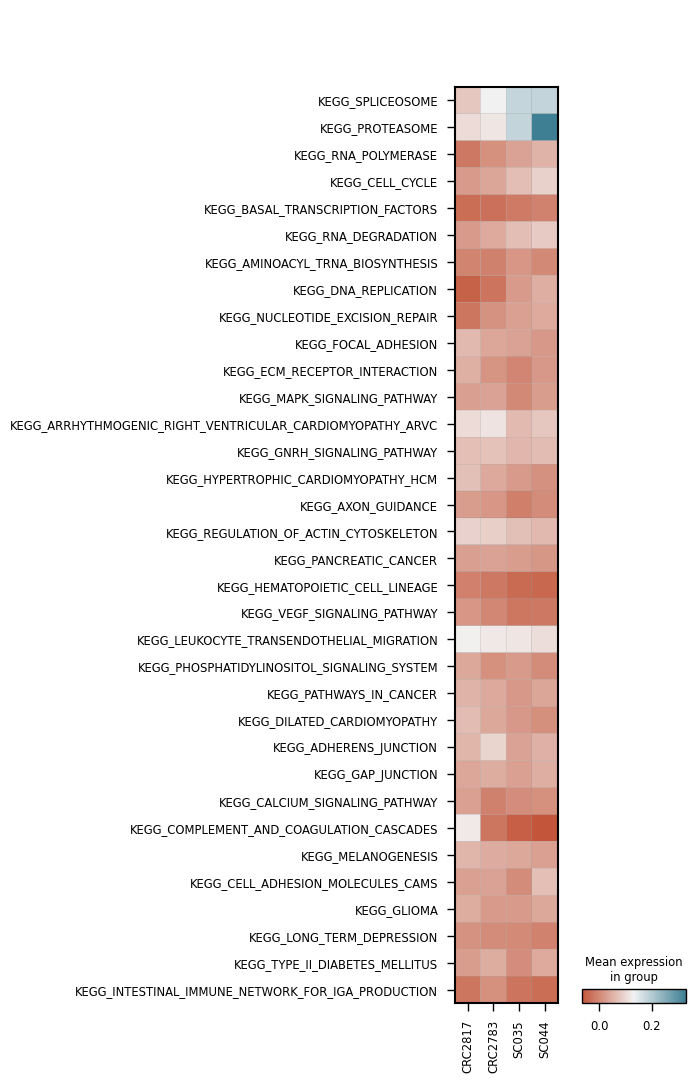

In [252]:
sc.pl.matrixplot(adata_tumor, 
              var_names = list(joanito_table3.columns), 
              groupby='patient.ID', 
              categories_order=['CRC2817', 'CRC2783', 'SC035', 'SC044'], 
              cmap=sns.diverging_palette(20, 220, as_cmap=True),
              swap_axes=True)

#### (3) Table 4: MAPK gene signatures

In [256]:
for pathway in joanito_table4.columns:
    hallmark_genes = list(joanito_table4[pathway].dropna())
    sc.tl.score_genes( adata_tumor, hallmark_genes, score_name=pathway )

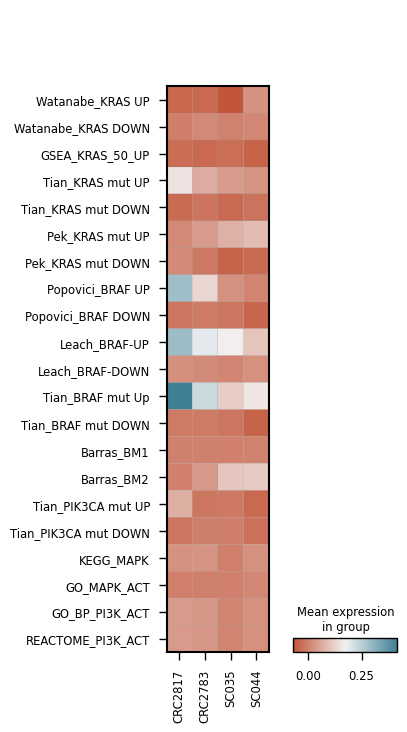

In [257]:
sc.pl.matrixplot(adata_tumor, 
              var_names = list(joanito_table4.columns), 
              groupby='patient.ID', 
              categories_order=['CRC2817', 'CRC2783', 'SC035', 'SC044'], 
              cmap=sns.diverging_palette(20, 220, as_cmap=True),
              swap_axes=True)

#### (4) Table 5: Currated metabolism gene signatures

In [259]:
for pathway in joanito_table5.columns:
    hallmark_genes = list(joanito_table5[pathway].dropna())
    sc.tl.score_genes( adata_tumor, hallmark_genes, score_name=pathway )

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


       'SLCO4A1AS1', 'TP73AS1'],
      dtype='object')


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

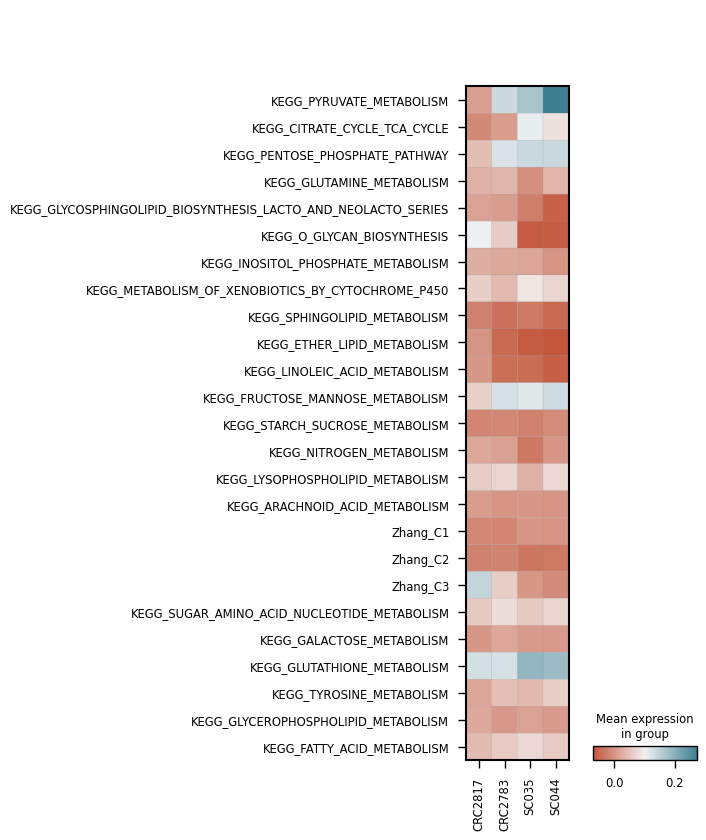

In [260]:
sc.pl.matrixplot(adata_tumor, 
              var_names = list(joanito_table5.columns), 
              groupby='patient.ID', 
              categories_order=['CRC2817', 'CRC2783', 'SC035', 'SC044'], 
              cmap=sns.diverging_palette(20, 220, as_cmap=True),
              swap_axes=True)

#### (5) Table 6: Curated Wnt/β-catenin pathway gene signatures

In [265]:
for pathway in joanito_table6.columns:
    hallmark_genes = list(joanito_table6[pathway].dropna())
    sc.tl.score_genes( adata_tumor, hallmark_genes, score_name=pathway )

       'C1orf31', 'C22orf29', 'C2orf3', 'C3orf26', 'C4orf21', 'C4orf27',
       'C4orf43', 'C9orf41', 'CTPS', 'FAM108B1', 'FAM183B', 'FAM203A',
       'FAM82A2', 'FTSJD1', 'GSG2', 'HRSP12', 'HSPA8', 'IKBKAP', 'KIAA0101',
       'KIAA0947', 'KIAA1524', 'MRE11A', 'MTBP', 'MTF2', 'MTHFD1', 'MTRR',
       'RPL12', 'RPL3', 'RPL32', 'RPS24', 'RPS6KA6', 'SQRDL'],
      dtype='object')


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


       'ACSL5-AS'],
      dtype='object')


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


       'WAPAL', 'KIAA1033', 'PYCRL'],
      dtype='object')


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


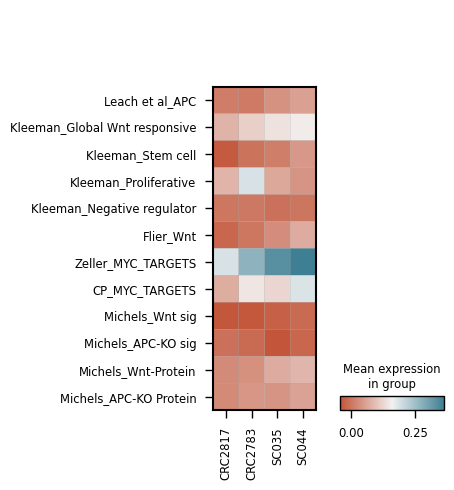

In [266]:
sc.pl.matrixplot(adata_tumor, 
              var_names = list(joanito_table6.columns), 
              groupby='patient.ID', 
              categories_order=['CRC2817', 'CRC2783', 'SC035', 'SC044'], 
              cmap=sns.diverging_palette(20, 220, as_cmap=True),
              swap_axes=True)

#### (6) Table 7: Curated TGF-β pathway gene signatures

In [268]:
for pathway in joanito_table7.columns:
    hallmark_genes = list(joanito_table7[pathway].dropna())
    sc.tl.score_genes( adata_tumor, hallmark_genes, score_name=pathway )

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


       'LOC728264', 'LOC100128178', 'C5orf13', 'MURC', 'LOC201651', 'TMEM49',
       'C4orf26', 'TMEM2', 'MTSS1', 'JHDM1D', 'LOC727930'],
      dtype='object')


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


       'ADAMS', 'DFNB31', 'TMEM180',
       ...
       'LOC652993', 'LOC645638', 'PPPIR9A', 'C9orf68', 'CCDC67', 'HESS',
       'APOB48R', 'LOC100289219', 'NCRNA00265', 'FAM46C'],
      dtype='object', length=171)


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


       'Sep-11', 'PROSC', 'HSP90AA1', 'HDGFRP3', 'HSPG2', 'IL8', 'HSPA13',
       'MTUS1', 'PPPDE1', 'MEIS3P1', 'CSDA', 'SDPR', 'CHP', 'MGEA5', 'Mar-07',
       'HSP90B1', 'SELT', 'Sep-02', 'RBM9', 'C5orf28', 'HSPH1', 'NUS1P3',
       'SMEK1', 'MT1E', 'MT1X', 'MT1M', 'SRSF2IP', 'KIAA0494', 'C1orf144',
       'GPR56', 'SETD8', 'C19orf6', 'MTMR1', 'C14orf101', 'GRLF1', 'ROD1',
       'RRN3P1', 'C1orf103', 'Mar-06', 'C20orf30', 'ZNF192', 'MOBKL1B',
       'HSPD1', 'KIAA0776', 'SRPR', 'KIAA0182', 'ORC5L', 'DIMT1L', 'DSCR3',
       'HSPA9'],
      dtype='object')


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


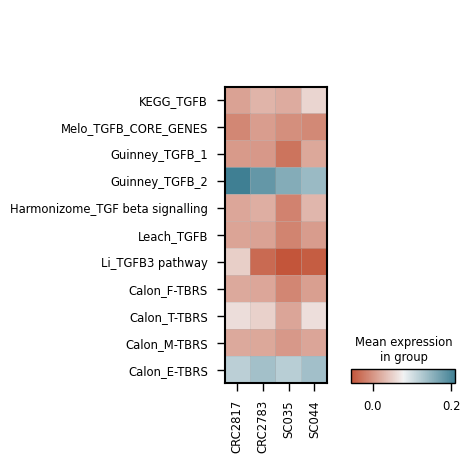

In [269]:
sc.pl.matrixplot(adata_tumor, 
              var_names = list(joanito_table7.columns), 
              groupby='patient.ID', 
              categories_order=['CRC2817', 'CRC2783', 'SC035', 'SC044'], 
              cmap=sns.diverging_palette(20, 220, as_cmap=True),
              swap_axes=True)

### DEG

In [230]:
df_smillie_marker = pd.read_csv('/node200data/18parkky/datasets/reference/marker_genes/colon/Smillie_et_al/colon_epithelial_marker.csv')
sc.tl.score_genes(adata_tumor, list(df_smillie_marker[df_smillie_marker['ident']=='Goblet']['gene']), score_name='Goblet_score')

       'CTD-2589M5.4', 'RP3-340N1.5', 'AGAP1-IT1', 'FAM101A', 'MT-RNR2',
       'MFSD4', 'RP11-665N17.4', 'RP11-48O20.4', 'RP11-845C23.2',
       'RP11-757F18.5', 'RP11-92K15.3', 'GAREM'],
      dtype='object')


In [241]:
sc.tl.score_genes(adata_tumor, list(df_smillie_marker[df_smillie_marker['ident']=='Stem']['gene']), score_name='Stem_score')

       'RP11-84C10.4', 'C1orf95', 'RPS2', 'RPL3', 'RP11-219E7.4', 'RPS3A',
       'RPL5', 'RPSA', 'RP11-290L1.2', 'GYLTL1B', 'RPS6', 'RPL31', 'RPS4X',
       'RPS21', 'AP000344.3', 'RP11-760H22.2', 'RPS9', 'RPLP0', 'RPL14',
       'ATP5G1', 'RP11-435O5.2', 'RP11-519G16.5', 'HSPD1', 'MT1G', 'ADCK3',
       'MT1E', 'NGFRAP1', 'RPSAP58'],
      dtype='object')


In [243]:
sc.tl.score_genes(adata_tumor, list(df_smillie_marker[df_smillie_marker['ident']=='E.Secretory']['gene']), score_name='E.Secretory_score')

       'AC009133.21', 'RP11-384L8.1', 'RN7SKP127', 'RP3-340N1.5', 'MT-RNR1',
       'CTD-2589M5.4', 'CYorf17', 'AGAP1-IT1', 'RP11-700H6.1', '7SK', 'MT-ND5',
       'RP11-757F18.5', 'FAM101A', 'RP11-845C23.2', 'RNA18S5', 'RP5-821D11.7'],
      dtype='object')


In [240]:
set(df_smillie_marker['ident'])

{'Best4+ Enterocytes',
 'Cycling TA',
 'E.Absorptive',
 'E.Absorptive_All',
 'E.Epithelial',
 'E.Immature_Enterocytes',
 'E.Secretory',
 'E.Secretory_All',
 'Enterocyte Progenitors',
 'Enterocytes',
 'Enteroendocrine',
 'Goblet',
 'Immature Enterocytes 1',
 'Immature Enterocytes 2',
 'Immature Goblet',
 'M cells',
 'Secretory TA',
 'Stem',
 'TA 1',
 'TA 2',
 'Tuft'}

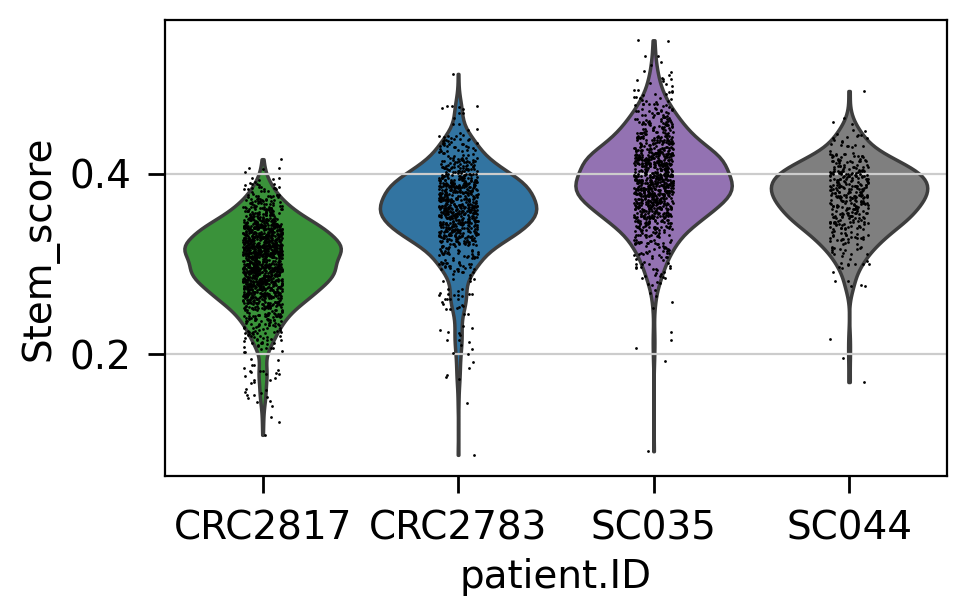

In [242]:
with plt.rc_context({"figure.figsize": (5, 3), "figure.dpi": (100)}):
    sc.pl.violin(adata_tumor, keys='Stem_score', groupby='patient.ID', order=['CRC2817', 'CRC2783', 'SC035', 'SC044'])

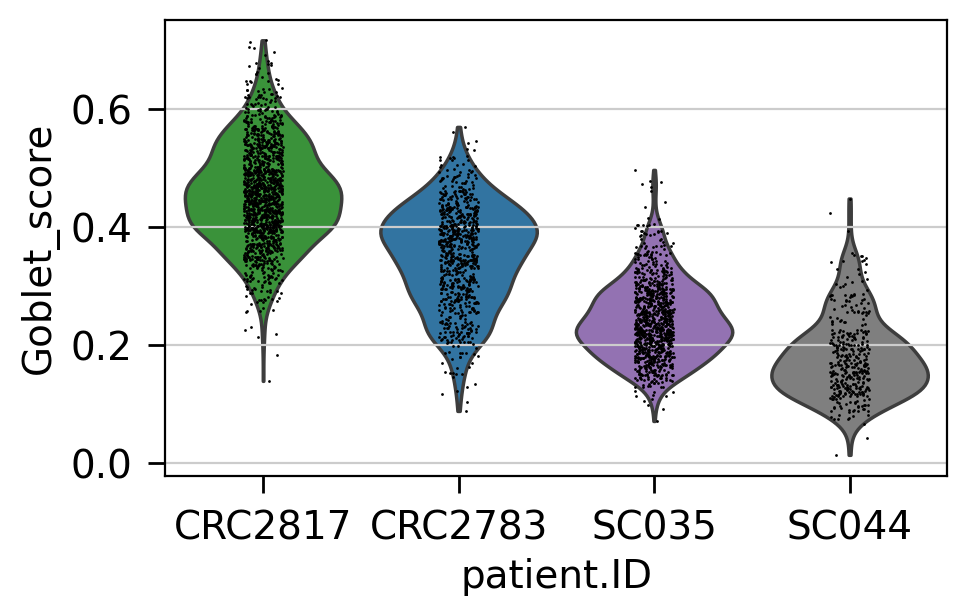

In [239]:
with plt.rc_context({"figure.figsize": (5, 3), "figure.dpi": (100)}):
    sc.pl.violin(adata_tumor, keys='Goblet_score', groupby='patient.ID', order=['CRC2817', 'CRC2783', 'SC035', 'SC044'])

In [257]:
poi = 'CRC2817'
poi = 'SC044'

len(set(df_smillie_marker[df_smillie_marker['ident']=='E.Secretory']['gene']).intersection( set(DEG[DEG['patient']==poi]['gene_name']) )) / len(set(DEG[DEG['patient']==poi]['gene_name']))

0.009078212290502794

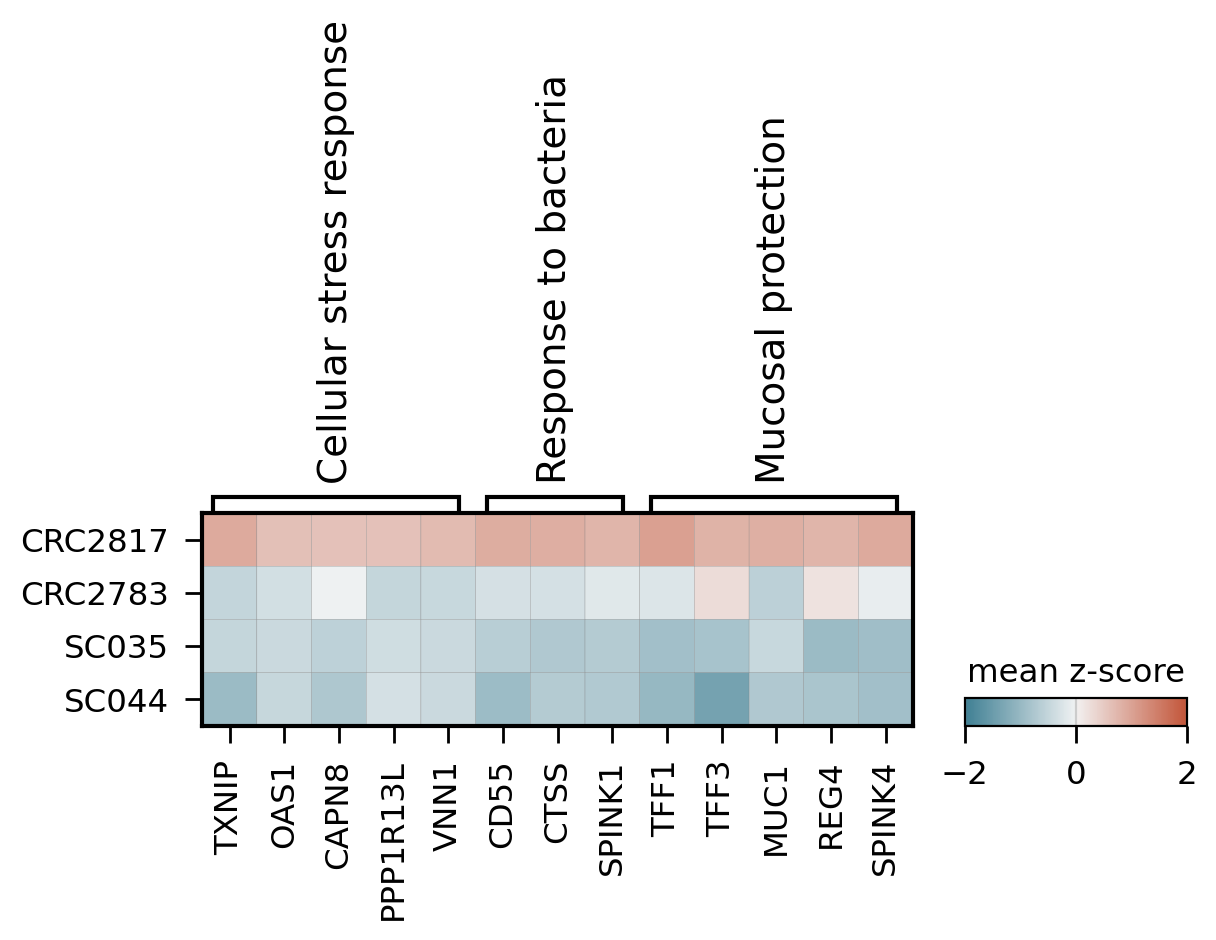

In [233]:
with plt.rc_context({"figure.figsize": (8, 3), "figure.dpi": (100)}):
    sc.pl.matrixplot( adata_tumor, 
                    var_names={ 'Cellular stress response' : ['TXNIP', 'OAS1', 'CAPN8', 'PPP1R13L', 'VNN1'],
                                'Response to bacteria' : ['CD55', 'CTSS', 'SPINK1',],
                                'Mucosal protection' : ['TFF1', 'TFF3', 'MUC1', 'REG4', 'SPINK4',], 
                                }, 
                    groupby='patient.ID', 
                    layer="scaled", colorbar_title="mean z-score",
                    vmin=-2, vmax=2, 
                    cmap=sns.diverging_palette(220, 20, as_cmap=True,),
                    categories_order=['CRC2817', 'CRC2783', 'SC035', 'SC044'],
                    swap_axes=False
                    )

In [ ]:
top_n = 6
DEG_genes =  list()

for patient in ['CRC2817', 'CRC2783', 'SC035', 'SC044']:
    for gene in list(DEG[(DEG['patient']==patient) & (DEG['pvals_adj']<=0.01) & (DEG['logfoldchanges']>=2.0)].sort_values("score", ascending=False)[:top_n]['gene_name']):
        DEG_genes.append(gene)
        
with plt.rc_context({"figure.figsize": (8, 3), "figure.dpi": (100)}):
    sc.pl.matrixplot( adata_tumor, 
                    var_names=DEG_genes, 
                    groupby='patient.ID', 
                    layer="scaled", colorbar_title="mean z-score",
                    vmin=-1, vmax=1, 
                    cmap=sns.diverging_palette(220, 20, as_cmap=True,),
                    categories_order=['CRC2817', 'CRC2783', 'SC035', 'SC044'],
                    swap_axes=False
                    )

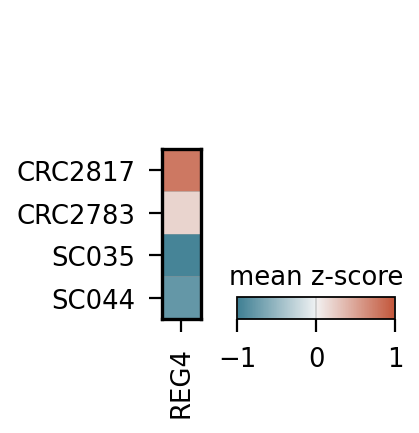

In [180]:
sc.pl.matrixplot( adata_tumor, 
                var_names=['REG4'], 
                groupby='patient.ID', 
                layer="scaled", colorbar_title="mean z-score",
                vmin=-1, vmax=1, 
                cmap=sns.diverging_palette(220, 20, as_cmap=True,),
                categories_order=['CRC2817', 'CRC2783', 'SC035', 'SC044'],
                swap_axes=False
                )

In [453]:
MSI_phenotype_correlated_DEGs = ['MUC13',   'KDELR2',   'STMN1', 'ME1',     'HS3ST1',   'S100A10',  'B2M',   'COL16A1', 'GCHFR', 'S100A6',  'S100P',    'LRPAP1',  'FXYD3',
                                'ODC1',    'EMC10',    'NUDT9', 'PEBP1',   'SOX4',     'NEAT1',    'PSMD2', 'LDHB',    'TXNIP', 'IFI6',    'TFF1',     'MIA3',    'CRIP1', 
                                'TFF3',    'MUC3A',    'CD24',  'FDX1',    'S100A11',  'SYPL1',    'CD55',  'RCN1',    'ID2',   'MALAT1',  'CEACAM5',  'DNAJC10', 'CTSE',
                                'TSPAN13', 'COPS6',    'LGALS4','EML2',    'LAMC2',    'SMC2',     'LAMP1', 'ANXA1',   'TCN2',  'CAPN2',   'LDHA',     'MARCKSL1', 'PMEPA1'
                                ]


MSI_phenotype_correlated_DEGs_sorted = ['TSPAN13',
 'COL16A1',
 'ANXA1',
 'CTSE',
 'STMN1',
 'RCN1',
 'LGALS4',
 'SOX4',
 'S100A11',
 'NEAT1',
 'S100P',
 'CD24',
 'CEACAM5',
 'CD55',
 'LDHB',
 'CAPN2',
 'TXNIP',
 'MALAT1',
 'MUC13',
 'TFF3',
 'B2M',
 'TFF1',
 'TCN2',
 'HS3ST1',
 'PMEPA1',
 'FXYD3',
 'ODC1',
 'IFI6',
 'LAMC2',
 'ID2',
 'LDHA']

In [447]:
X_CRC2817 = adata_tumor[adata_tumor.obs['patient.ID']=='CRC2817'].X.copy()
X_CRC2783 = adata_tumor[adata_tumor.obs['patient.ID']=='CRC2783'].X.copy()
X_SC035 = adata_tumor[adata_tumor.obs['patient.ID']=='SC035'].X.copy()
X_SC044 = adata_tumor[adata_tumor.obs['patient.ID']=='SC044'].X.copy()

list_sig_gene = list()
for idx, tup in enumerate(adata_tumor.var[adata_tumor.var.index.isin(MSI_phenotype_correlated_DEGs)].itertuples()):
    
    CRC2817_exp = np.mean( [arr.toarray().ravel()[idx] for arr in X_CRC2817] )
    CRC2783_exp = np.mean( [arr.toarray().ravel()[idx] for arr in X_CRC2783] )
    SC035_exp = np.mean( [arr.toarray().ravel()[idx] for arr in X_SC035] )
    SC044_exp = np.mean( [arr.toarray().ravel()[idx] for arr in X_SC044] )
    
    pearsonr = stats.pearsonr( x=[-0.59, -1.72, -1.7, -2.81], y=[CRC2817_exp, CRC2783_exp, SC035_exp, SC044_exp] )
    list_sig_gene.append( [tup.Index, CRC2817_exp, CRC2783_exp, SC035_exp, SC044_exp, pearsonr[0], pearsonr[1]] )

sig_gene = pd.DataFrame(list_sig_gene, columns=['gene', 'CRC2817_exp', 'CRC2783_exp', 'SC035_exp', 'SC044_exp', 'r', 'pval'])

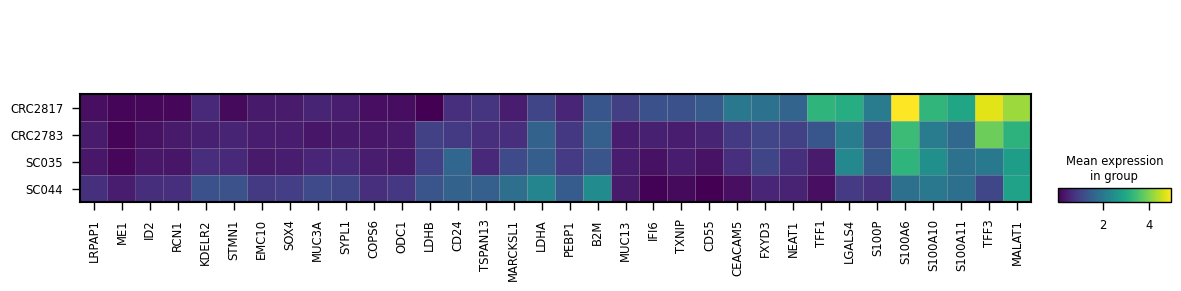

In [586]:
blacklist = ['MUC13', 'ME1', 'HS3ST1', 'COL16A1', 'GCHFR', 'LRPAP1', 'ODC1', 'NUDT9', 'PSMD2', 'MIA3', 'CRIP1', 'FDX1', 'DNAJC10', 'CTSE', 'EML2', 'SMC2', 'LAMP1', 'ANXA1', 'TCN2', 'CAPN2', 'PMEPA1', 'LAMC2']
MSI_phenotype_correlated_DEGs_whitelist = [
    'LRPAP1', 'ME1', 'ID2', 'RCN1', 'KDELR2', 'STMN1', 'EMC10', 'SOX4', 'MUC3A', 'SYPL1', 'COPS6',
    'ODC1', 'LDHB', 'CD24', 'TSPAN13', 'MARCKSL1', 'LDHA', 'PEBP1', 'B2M', 
    'MUC13', 'IFI6', 'TXNIP', 'CD55', 'CEACAM5', 'FXYD3', 'NEAT1', 'TFF1', 'LGALS4', 
    'S100P', 'S100A6', 'S100A10', 'S100A11',
    'TFF3', 'MALAT1',
 ]

sc.pl.matrixplot( adata_tumor, 
              var_names=MSI_phenotype_correlated_DEGs_whitelist, 
              groupby='patient.ID', 
              categories_order=['CRC2817', 'CRC2783', 'SC035', 'SC044'], swap_axes=False)

In [ ]:
# Stress Response and Cell Proliferation (bulk agrees)
sc.pl.matrixplot( adata_tumor, 
              var_names=['S100P', 'S100A10', 'S100A11', 'S100A6', ], 
              groupby='patient.ID', 
              categories_order=['CRC2817', 'CRC2783', 'SC035', 'SC044'], swap_axes=False)

In [ ]:
# Metabolism (bulk agrees)
sc.pl.matrixplot( adata_tumor, 
              var_names=['LDHA', 'LDHB',], 
              groupby='patient.ID', 
              categories_order=['CRC2817', 'CRC2783', 'SC035', 'SC044'], swap_axes=False)

In [ ]:
# Cell Cycle and Proliferation (bulk disagrees)
sc.pl.matrixplot( adata_tumor, 
              var_names=['PSMD2', 'COPS6', 'ID2'], 
              groupby='patient.ID', 
              categories_order=['CRC2817', 'CRC2783', 'SC035', 'SC044'], swap_axes=False)

In [ ]:
# Signaling and Transcription (bulk disagrees; except IFI6 (stress response))
sc.pl.matrixplot( adata_tumor, 
              var_names=['SOX4', 'NEAT1', 'IFI6'], 
              groupby='patient.ID', 
              categories_order=['CRC2817', 'CRC2783', 'SC035', 'SC044'], swap_axes=False)

In [ ]:
# Mucosal repair (bulk agrees)
sc.pl.matrixplot( adata_tumor, 
              var_names=['TFF1', 'TFF3', ], 
              groupby='patient.ID', 
              categories_order=['CRC2817', 'CRC2783', 'SC035', 'SC044'], swap_axes=False)

In [555]:
adata_tumor = adata_tumor.raw.to_adata()
adata_tumor.layers["scaled"] = sc.pp.scale(adata_tumor, copy=True).X

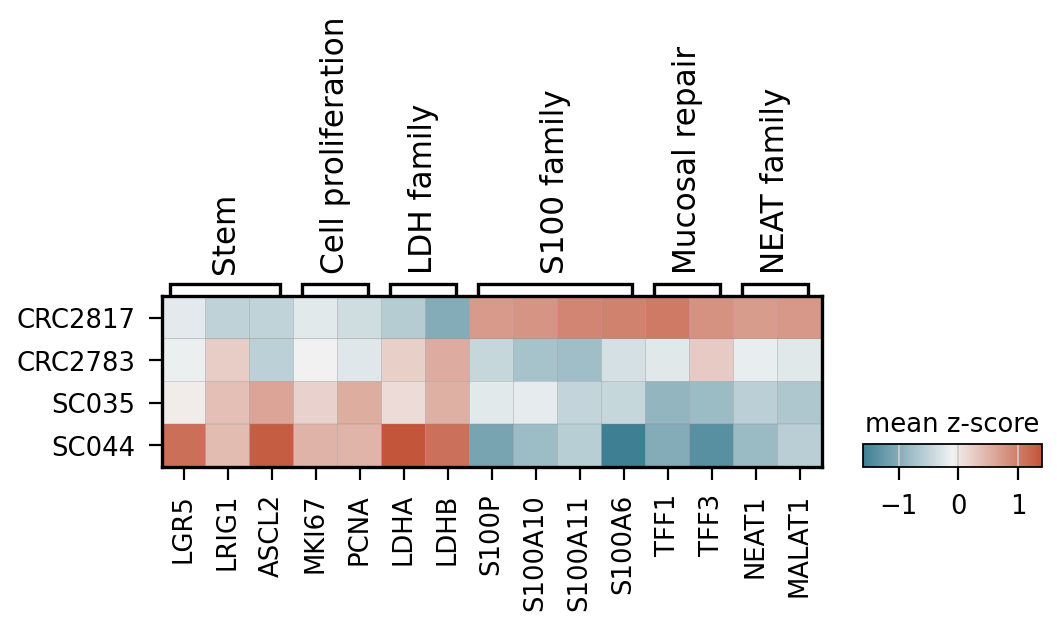

In [193]:
sc.pl.matrixplot( adata_tumor, 
              var_names={
                            'Stem' : ['LGR5', 'LRIG1', 'ASCL2'],
                            'Cell proliferation' : ['MKI67', 'PCNA',],

                            'LDH family' : ['LDHA', 'LDHB'], 
                            'S100 family' : ['S100P', 'S100A10', 'S100A11', 'S100A6', ], 
                            'Mucosal repair' : ['TFF1', 'TFF3'],

                            'NEAT family' : ['NEAT1', 'MALAT1',],                          
                            }, 
              groupby='patient.ID', 
              layer="scaled", colorbar_title="mean z-score",
              cmap=sns.diverging_palette(220, 20, as_cmap=True,),
              categories_order=['CRC2817', 'CRC2783', 'SC035', 'SC044'], 
              swap_axes=False,
              )

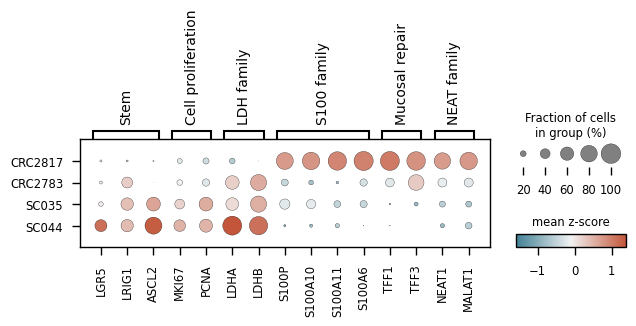

In [772]:
sc.pl.dotplot( adata_tumor, 
              var_names={ 
                            'Stem' : ['LGR5', 'LRIG1', 'ASCL2'],
                            'Cell proliferation' : ['MKI67', 'PCNA',],

                            'LDH family' : ['LDHA', 'LDHB'], 
                            'S100 family' : ['S100P', 'S100A10', 'S100A11', 'S100A6', ], 
                            'Mucosal repair' : ['TFF1', 'TFF3'], 
                            
                            'NEAT family' : ['NEAT1', 'MALAT1',],
                                                        
                            }, 
              groupby='patient.ID', 
              layer="scaled", colorbar_title="mean z-score",
              cmap=sns.diverging_palette(220, 20, as_cmap=True,),
              categories_order=['CRC2817', 'CRC2783', 'SC035', 'SC044'], swap_axes=False)

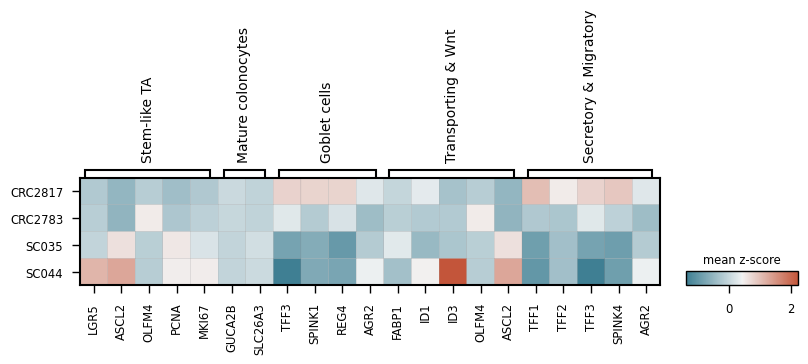

In [678]:
# Lineage-dependent gene expression programs influence the immune landscape of colorectal cancer
# Figure 2a.
sc.pl.matrixplot( adata_tumor, 
              var_names={ 
                            'Stem-like TA' : ['LGR5', 'ASCL2', 'OLFM4', 'PCNA', 'MKI67'],
                            'Mature colonocytes' : ['GUCA2B', 'SLC26A3', ],
                            'Goblet cells' : ['TFF3', 'SPINK1', 'REG4', 'AGR2'],
                            
                            'Transporting & Wnt' : ['FABP1', 'ID1', 'ID3' ,'OLFM4', 'ASCL2'],
                            'Secretory & Migratory' : ['TFF1', 'TFF2', 'TFF3', 'SPINK4', 'AGR2'],
                                                        
                            }, 
              groupby='patient.ID', 
              layer="scaled", colorbar_title="mean z-score",
              cmap=sns.diverging_palette(220, 20, as_cmap=True,),
              categories_order=['CRC2817', 'CRC2783', 'SC035', 'SC044'], swap_axes=False)

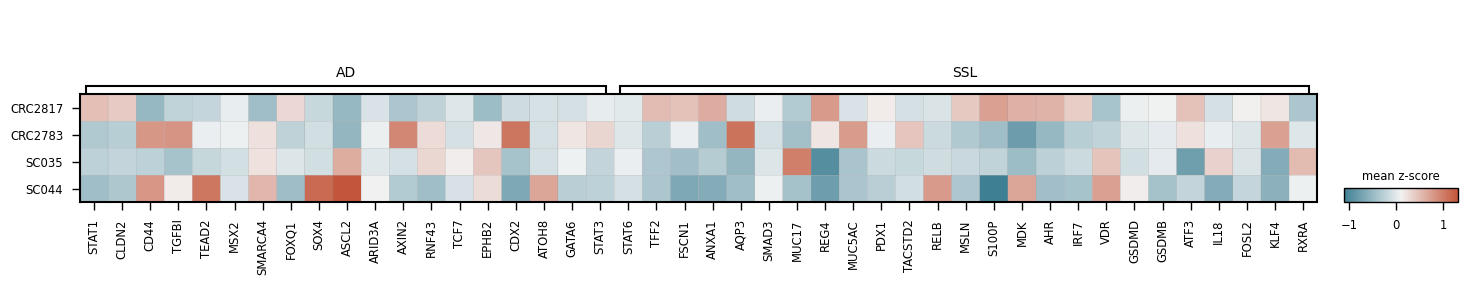

In [674]:
# Chen et al
# Figure 2a.
sc.pl.matrixplot( adata_tumor, 
              var_names={ 
                            'AD' : list(joanito_table9['Chen_AD'].dropna()),
                            'SSL' : list(joanito_table9['Chen_SSL'].dropna()),
                            }, 
              groupby='patient.ID', 
              layer="scaled", colorbar_title="mean z-score",
              cmap=sns.diverging_palette(220, 20, as_cmap=True,),
              categories_order=['CRC2817', 'CRC2783', 'SC035', 'SC044'], swap_axes=False)

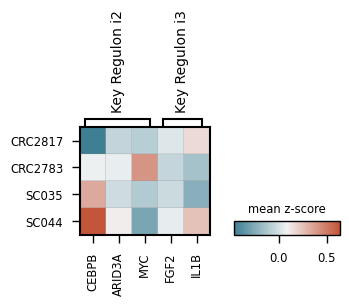

In [726]:
sc.pl.matrixplot( adata_tumor, 
              var_names={ 
                         'Key Regulon i2' : ['CEBPB', 'ARID3A', 'MYC'],
                         'Key Regulon i3' : ['FGF2', 'IL1B',],

                            }, 
              groupby='patient.ID', 
              layer="scaled", colorbar_title="mean z-score",
              cmap=sns.diverging_palette(220, 20, as_cmap=True,),
              categories_order=['CRC2817', 'CRC2783', 'SC035', 'SC044'], swap_axes=False)

### L

In [728]:
selected_hallmarks = [  'HALLMARK_MYC_TARGETS_V1', 'HALLMARK_MYC_TARGETS_V2', 
                        'HALLMARK_E2F_TARGETS', 'HALLMARK_UNFOLDED_PROTEIN_RESPONSE',  
                        'HALLMARK_DNA_REPAIR', 'HALLMARK_WNT_BETA_CATENIN_SIGNALING', 
                        'HALLMARK_ESTROGEN_RESPONSE_EARLY', 'HALLMARK_ESTROGEN_RESPONSE_LATE',
                        ]

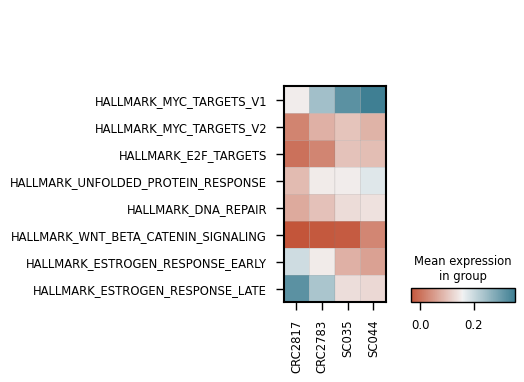

In [733]:
sc.pl.matrixplot(adata_tumor, 
              var_names = selected_hallmarks, 
              groupby='patient.ID', 
              categories_order=['CRC2817', 'CRC2783', 'SC035', 'SC044'],
              cmap=sns.diverging_palette(20, 220, as_cmap=True),
              swap_axes=True,
              )

In [855]:
chem_patient_meta       = pd.read_csv('/node200data/18parkky/datasets/data/public/FASTQ/Chen_et_al/Chen_et_al.patient_meta.csv')
chem_sample_meta        = pd.read_csv('/node200data/18parkky/datasets/data/public/FASTQ/Chen_et_al/Chen_et_al.sample_meta.csv')
chem_experiment_meta    = pd.read_csv('/node200data/18parkky/datasets/data/public/FASTQ/Chen_et_al/Chen_et_al.experiment_meta.csv')
chem_run_meta           = pd.read_csv('/node200data/18parkky/datasets/data/public/FASTQ/Chen_et_al/Chen_et_al.run_meta.csv')

chem_msi_patient_meta = chem_patient_meta[(chem_patient_meta['MSI/MSS']=='MSI')].copy()
chem_msi_patient_meta[chem_msi_patient_meta['Patient ID']=='P04']

Patient ID  Age  Gender Cancer Type   Tumor Location      TNM Tumor stage  \
3        P04   47  Female         CRC  Ascending colon  T4aN+M0         III   

  dMMR/pMMR MSI/MSS POLE Mutation TMB (Muts/Mb)  Tumor Regression Ratio  \
3      dMMR     MSI            No           487                   0.918   

  Response TRG status Treatment Regimen  
3       CR       TRG0     Pembrolizumab

In [856]:
chem_sample_meta[chem_sample_meta['Patient ID']=='P04']

ID  Sample ID Patient ID             Biopsy Site Sampling Stage  \
25  26    P04-B-I        P04        Peripheral blood              I   
26  27    P04-N-I        P04  Adjacent normal tissue              I   
27  28    P04-T-I        P04                   Tumor              I   
28  29   P04-B-II        P04        Peripheral blood             II   
29  30   P04-N-II        P04  Adjacent normal tissue             II   
30  31   P04-T-II        P04                   Tumor             II   
31  32  P04-B-III        P04        Peripheral blood            III   
32  33  P04-N-III        P04  Adjacent normal tissue            III   
33  34  P04-T-III        P04                   Tumor            III   

   Treatment Stage Treatment point Sampling approach  
25             Pre        Baseline        Blood draw  
26             Pre        Baseline       Colonoscopy  
27             Pre        Baseline       Colonoscopy  
28              On    Post 2 cycle        Blood draw  
29              On    Post 2 cycle       Colonoscopy  
30              On    Post 2 cycle       Colonoscopy  
31            Post    Post 2 cycle        Blood draw  
32            Post    Post 2 cycle           Surgery  
33            Post    Post 2 cycle           Surgery

In [857]:
chem_experiment_meta[(chem_experiment_meta['BioSample name']=='P01-B-I')]

Accession           Experiment title BioSample name BioSample accession  \
0  HRX1075490    20191125-CRC-GBD-PBMC-5        P01-B-I           HRS945688   
1  HRX1075491  20191125-CRC-GBD-PBMC-TCR        P01-B-I           HRS945688   

                Platform       Library Construction / Experimental Design  \
0  Illumina NovaSeq 6000  10X single-cell 5-prime gene expression library   
1  Illumina NovaSeq 6000                      10X single-cell VDJ library   

   Library name          Strategy                      Source Selection  \
0           NaN           RNA-Seq  TRANSCRIPTOMIC SINGLE CELL     PolyA   
1           NaN  Targeted-Capture  TRANSCRIPTOMIC SINGLE CELL     other   

   Layout  Read length for mate1(bp)  Read length for mate 2(bp)  \
0  PAIRED                        150                         150   
1  PAIRED                        150                         150   

   Insert size (bp)  Nominal size (bp)  Nominal standard deviation (bp)  \
0               NaN                NaN                              NaN   
1               NaN                NaN                              NaN   

   Planned number of cycles  
0                       NaN  
1                       NaN

In [860]:
chem_run_meta[chem_run_meta['Experiment accession']=='HRX1075490']

Accession                        Run title Experiment accession  \
0  HRR1372880  20191125-CRC-GBD-PBMC-5_S1_L004           HRX1075490   
1  HRR1372879  20191125-CRC-GBD-PBMC-5_S1_L003           HRX1075490   
2  HRR1372878  20191125-CRC-GBD-PBMC-5_S1_L002           HRX1075490   
3  HRR1372877  20191125-CRC-GBD-PBMC-5_S1_L001           HRX1075490   

  Run data file type             File name 1  \
0              fastq  HRR1372880_f1.fastq.gz   
1              fastq  HRR1372879_f1.fastq.gz   
2              fastq  HRR1372878_f1.fastq.gz   
3              fastq  HRR1372877_f1.fastq.gz   

                     MD5 checksum 1  DownLoad1             File name 2  \
0  1a3ff13bb42880a2685dd1dc739618a1        NaN  HRR1372880_r2.fastq.gz   
1  447592b42b31b92a99be1f90d63feee3        NaN  HRR1372879_r2.fastq.gz   
2  43b2e4417bcb6aeafd51913cb4135f00        NaN  HRR1372878_r2.fastq.gz   
3  bc2fb615aea413fb0484d9bb6f393edf        NaN  HRR1372877_r2.fastq.gz   

                     MD5 checksum 2  DownLoad2  Reference file name  \
0  5cba92ce2aeb3d6d1691f8a70abc3bc0        NaN                  NaN   
1  f32e2980224d06ac78b6bee7713ee2e5        NaN                  NaN   
2  bece793263ac5a9658b5455f1edd5290        NaN                  NaN   
3  73f5dcfc5d3c17605cf40a2a950c43b8        NaN                  NaN   

   MD5 for reference file  Assembly Name or Accession  Assembly Accession URL  
0                     NaN                         NaN                     NaN  
1                     NaN                         NaN                     NaN  
2                     NaN                         NaN                     NaN  
3                     NaN                         NaN                     NaN

In [844]:
chem_run_meta[chem_run_meta['Experiment accession'].isin( chem_experiment_meta[(chem_experiment_meta['Library Construction / Experimental Design']=='10X single-cell 5-prime gene expression library')]['Accession'] )]

Accession                        Run title Experiment accession  \
0     HRR1372880  20191125-CRC-GBD-PBMC-5_S1_L004           HRX1075490   
1     HRR1372879  20191125-CRC-GBD-PBMC-5_S1_L003           HRX1075490   
2     HRR1372878  20191125-CRC-GBD-PBMC-5_S1_L002           HRX1075490   
3     HRR1372877  20191125-CRC-GBD-PBMC-5_S1_L001           HRX1075490   
8     HRR1372896     20191223-CRC-GBD-B-5_S1_L004           HRX1075492   
...          ...                              ...                  ...   
1339  HRR1373833       20211230-CRC26-T-5_S1_L001           HRX1075824   
1344  HRR1374144       20220303-CRC26-T-5_S1_L004           HRX1075826   
1345  HRR1374143       20220303-CRC26-T-5_S1_L003           HRX1075826   
1346  HRR1374142       20220303-CRC26-T-5_S1_L002           HRX1075826   
1347  HRR1374141       20220303-CRC26-T-5_S1_L001           HRX1075826   

     Run data file type             File name 1  \
0                 fastq  HRR1372880_f1.fastq.gz   
1                 fastq  HRR1372879_f1.fastq.gz   
2                 fastq  HRR1372878_f1.fastq.gz   
3                 fastq  HRR1372877_f1.fastq.gz   
8                 fastq  HRR1372896_f1.fastq.gz   
...                 ...                     ...   
1339              fastq  HRR1373833_f1.fastq.gz   
1344              fastq  HRR1374144_f1.fastq.gz   
1345              fastq  HRR1374143_f1.fastq.gz   
1346              fastq  HRR1374142_f1.fastq.gz   
1347              fastq  HRR1374141_f1.fastq.gz   

                        MD5 checksum 1  DownLoad1             File name 2  \
0     1a3ff13bb42880a2685dd1dc739618a1        NaN  HRR1372880_r2.fastq.gz   
1     447592b42b31b92a99be1f90d63feee3        NaN  HRR1372879_r2.fastq.gz   
2     43b2e4417bcb6aeafd51913cb4135f00        NaN  HRR1372878_r2.fastq.gz   
3     bc2fb615aea413fb0484d9bb6f393edf        NaN  HRR1372877_r2.fastq.gz   
8     887f9ace749fecf9db8bdb8f68631278        NaN  HRR1372896_r2.fastq.gz   
...                                ...        ...                     ...   
1339  02c3b87731d2f0a1466cf5552b42e264        NaN  HRR1373833_r2.fastq.gz   
1344  d76ca76c6a165ebac4875809c2d32cc1        NaN  HRR1374144_r2.fastq.gz   
1345  2615be05dbdea1deb09127bb4f916bf3        NaN  HRR1374143_r2.fastq.gz   
1346  f7fbfb6e372c3484fc0a5af3639fdde6        NaN  HRR1374142_r2.fastq.gz   
1347  a0de9c5f41bd5158467d206abdc0d95f        NaN  HRR1374141_r2.fastq.gz   

                        MD5 checksum 2  DownLoad2  Reference file name  \
0     5cba92ce2aeb3d6d1691f8a70abc3bc0        NaN                  NaN   
1     f32e2980224d06ac78b6bee7713ee2e5        NaN                  NaN   
2     bece793263ac5a9658b5455f1edd5290        NaN                  NaN   
3     73f5dcfc5d3c17605cf40a2a950c43b8        NaN                  NaN   
8     ca956f755f967871c1b4100ed35f727e        NaN                  NaN   
...                                ...        ...                  ...   
1339  adf96db1d724a773658e064bb12a42f7        NaN                  NaN   
1344  c28465e2e67c9154074df086d8baf4e1        NaN                  NaN   
1345  bc402afb07b558663ac36328d2a3aa1e        NaN                  NaN   
1346  4a33dc8779e065c63a5f5cbf6f2634eb        NaN                  NaN   
1347  09c584bb90d34425aa56f8aacdaa6f98        NaN                  NaN   

      MD5 for reference file  Assembly Name or Accession  \
0                        NaN                         NaN   
1                        NaN                         NaN   
2                        NaN                         NaN   
3                        NaN                         NaN   
8                        NaN                         NaN   
...                      ...                         ...   
1339                     NaN                         NaN   
1344                     NaN                         NaN   
1345                     NaN                         NaN   
1346                     NaN                         NaN   
1347                     NaN   

In [814]:
chem_sample_meta[chem_sample_meta['Patient ID'].isin( chem_msi_patient_meta['Patient ID'] )]

ID  Sample ID Patient ID             Biopsy Site Sampling Stage  \
0      1    P01-B-I        P01        Peripheral blood              I   
1      2    P01-N-I        P01  Adjacent normal tissue              I   
2      3    P01-T-I        P01                   Tumor              I   
3      4   P01-B-II        P01        Peripheral blood             II   
4      5  P01-T1-II        P01                   Tumor             II   
..   ...        ...        ...                     ...            ...   
164  165    P26-N-I        P26  Adjacent normal tissue              I   
165  166    P26-T-I        P26                   Tumor              I   
166  167   P26-B-II        P26        Peripheral blood             II   
167  168   P26-N-II        P26  Adjacent normal tissue             II   
168  169   P26-T-II        P26                   Tumor             II   

    Treatment Stage Treatment point Sampling approach  
0               Pre        Baseline        Blood draw  
1               Pre        Baseline       Colonoscopy  
2               Pre        Baseline       Colonoscopy  
3                On    Post 1 cycle        Blood draw  
4                On    Post 1 cycle       Colonoscopy  
..              ...             ...               ...  
164             Pre        Baseline       Colonoscopy  
165             Pre        Baseline       Colonoscopy  
166            Post    Post 3 cycle        Blood draw  
167            Post    Post 3 cycle           Surgery  
168            Post    Post 3 cycle           Surgery  

[169 rows x 8 columns]

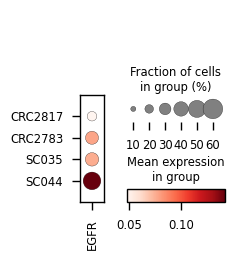

In [761]:
sc.pl.dotplot(adata_tumor, 
              var_names=['EGFR',], 
              groupby='patient.ID', 
              categories_order=['CRC2817', 'CRC2783', 'SC035', 'SC044'],
              )

In [622]:
import pysam

<Axes: ylabel='gene_name'>

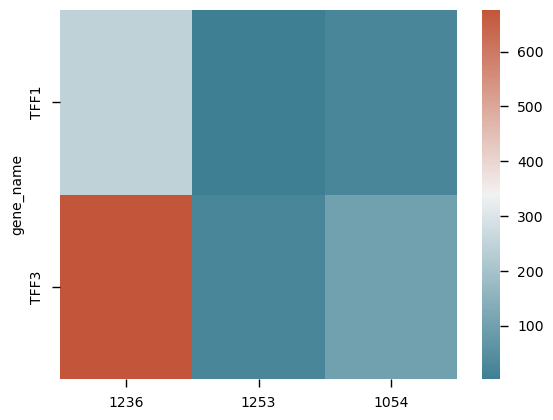

In [621]:
gene_oi = ['MKI67', 'PCNA', 'LDHA', 'LDHB', 'S100P', 'S100A10', 'S100A11', 'S100A6', 'TFF1', 'TFF3', 'NEAT1', 'MALAT1', 'LGR5', 'LRIG1'] 
gene_oi = [ 'TFF1', 'TFF3', ] 

# dict_patient_to_exp = dict()
# dict_patient_to_exp[ 1236 ] = list(df_TPM[(df_TPM['gene_name'].isin(gene_oi))]['1236'])[0]
# dict_patient_to_exp[ 1253 ] = list(df_TPM[(df_TPM['gene_name'].isin(gene_oi))]['1253'])[0]
# dict_patient_to_exp[ 1054 ] = list(df_TPM[(df_TPM['gene_name'].isin(gene_oi))]['1054'])[0]

# sns.barplot(dict_patient_to_exp, order=[1236, 1253, 1054])

df_TPM_oi = df_TPM[(df_TPM['gene_name'].isin(gene_oi))][['gene_name', '1236', '1253', '1054']]
df_TPM_oi.reset_index(drop=True, inplace=True)
df_TPM_oi.index = df_TPM_oi.pop('gene_name', )
df_TPM_oi = df_TPM_oi.reindex( gene_oi )
sns.heatmap(df_TPM_oi, cmap=sns.diverging_palette(220, 20, as_cmap=True,) )

### DEG

In [296]:
df_sc_metadata = pd.read_csv("/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/CRC-SG1/synapse-metadata/patient_clinical_information.csv", encoding='iso-8859-1')

In [49]:
sc.tl.rank_genes_groups( adata_tumor, groupby='patient.ID', method='wilcoxon' )

In [231]:
dict_deg = {
 'CRC2817': ['S100A6', 'TFF1', 'C19orf33', 'F3'],
 'CRC2783': ['PIGR', 'NME2', 'GSN', 'TPM2'],
 'SC035': ['PRELID1', 'ATP5F1D', 'CHCHD10', 'CALB1'],
 'SC044': ['PRSS21', 'HLA-A', 'NUPR1', 'MARCKSL1'], 
 }

dict_deg = {
 'CRC2817': ['S100A6', ],
 'CRC2783': ['PIGR',],
 'SC035': ['PRELID1', ],
 'SC044': ['PRSS21', 'MUC1'], 
 }

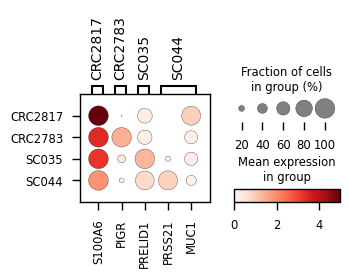

In [232]:
sc.pl.dotplot( adata_tumor, 
                dict_deg,
              groupby="patient.ID", swap_axes=False, categories_order=['CRC2817', 'CRC2783', 'SC035', 'SC044'],
              # groupby="MSI_status", swap_axes=False,
              )

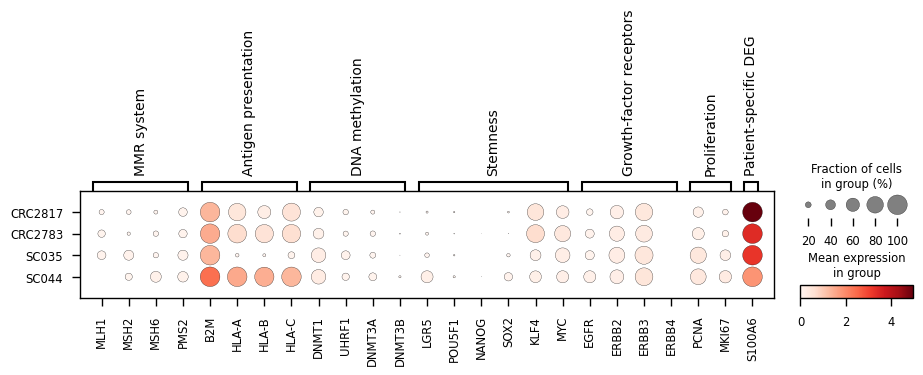

In [227]:
sc.pl.dotplot( adata_tumor, 
                {
                  'MMR system' : ['MLH1', 'MSH2', 'MSH6', 'PMS2'],
                  'Antigen presentation' : ['B2M', 'HLA-A', 'HLA-B', 'HLA-C', ], 
                  'DNA methylation' : ['DNMT1', 'UHRF1', 'DNMT3A', 'DNMT3B',], 
                  'Stemness' : ['LGR5', 'POU5F1', 'NANOG', 'SOX2', 'KLF4', 'MYC'],
                  'Growth-factor receptors' : ['EGFR', 'ERBB2', 'ERBB3', 'ERBB4'],
                  'Proliferation' : ['PCNA', 'MKI67',],
                  
                  'Patient-specific DEG' : ['S100A6', ],
                }, 
              groupby="patient.ID", swap_axes=False, categories_order=['CRC2817', 'CRC2783', 'SC035', 'SC044'],
              # groupby="MSI_status", swap_axes=False,
              )

In [222]:
adata_tumor

AnnData object with n_obs × n_vars = 3434 × 2000
    obs: 'nCount_RNA.x', 'nFeature_RNA.x', 'percent.mt', 'sample.ID', 'patient.ID', 'sample.origin', 'dataset', 'cell.type', 'orig.ident', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'leiden_res_0.02', 'leiden_res_0.10', 'leiden_res_0.20', 'leiden_res_0.30', 'leiden_res_0.50', 'leiden_res_1.00', 'cell_type_lvl1', 'cell_type_lvl2', 'MSI_status', 'sample.origin2', 'unique_ID', 'iCMS2_up', 'iCMS2_dw', 'iCMS3_up', 'iCMS3_dw', 'RawAvgDiff', 'RawStdDiff', 'RawSTRn', 'FiltAvgDiff', 'FiltStdDiff', 'FiltSTRn', 'isTumor'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_cou

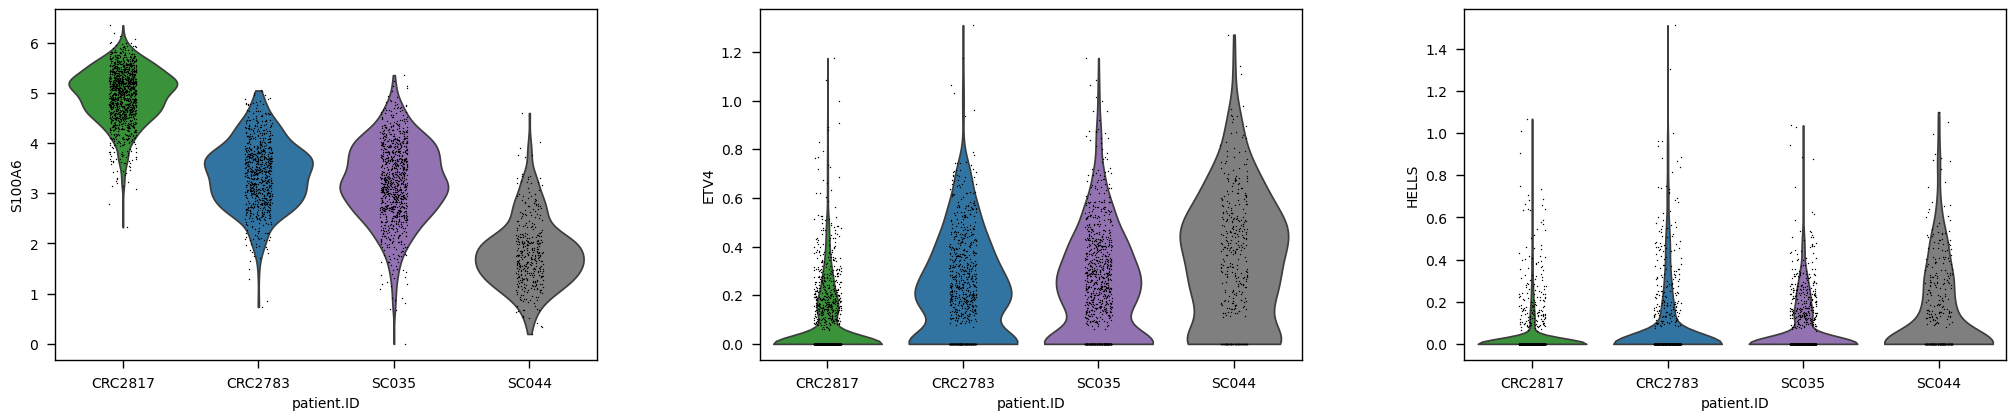

In [224]:
sc.pl.violin(adata_tumor, ['S100A6', 'ETV4', 'HELLS'], 
             hue='isTumor', 
             groupby="patient.ID", 
             order=['CRC2817', 'CRC2783', 'SC035', 'SC044'],
             )

## Bulk

In [127]:
df_1053 = pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/SG-BULK/MSS/1053.sorted.MAPQ_filtered.STR_allele_table.tsv', sep='\t')
df_1066 = pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/SG-BULK/MSS/1066.sorted.MAPQ_filtered.STR_allele_table.tsv', sep='\t')

df_1053['patient_ID'] = 1053
df_1066['patient_ID'] = 1066

df_1053['MSI_status'] = 'MSS'
df_1066['MSI_status'] = 'MSS'

df_1253 = pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/SG-BULK/MSI/1253.sorted.MAPQ_filtered.STR_allele_table.tsv', sep='\t')
df_1236 = pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/SG-BULK/MSI/1236.sorted.MAPQ_filtered.STR_allele_table.tsv', sep='\t')
df_1054 = pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/SG-BULK/MSI/1054.sorted.MAPQ_filtered.STR_allele_table.tsv', sep='\t')

df_1253['patient_ID'] = 1253
df_1236['patient_ID'] = 1236
df_1054['patient_ID'] = 1054

df_1253['MSI_status'] = 'MSI'
df_1236['MSI_status'] = 'MSI'
df_1054['MSI_status'] = 'MSI'

df = pd.concat( [df_1053, df_1054, df_1066, df_1253, df_1236] )
df["diff"] = df["read_STR_length"] - df["reference_STR_allele"] # diff<0 = Deletions++, diff>0 = Insertions++ 

In [ ]:
df_SG_BULK_Meta = pd.read_csv('/node200data/18parkky/datasets/data/public/FASTQ/SG-BULK/Synapse-metadata/SG-BULK_patient_clinical_information.iCMS3_MSI.tsv', sep='\t')

In [141]:
gff = pd.read_csv('/node200data/18parkky/datasets/reference/transcriptome/GFF/GRCh38.attribute_labeled.gff3', sep='\t', )
# gff.columns = ['seqid', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes']

In [163]:
df_TPM = pd.read_csv('/node200data/18parkky/datasets/data/public/FASTQ/SG-BULK/Synapse-metadata/SG-BULK_salmonTPM.csv')
df_TPM.rename({'Unnamed: 0' : 'gene_id'}, axis=1, inplace=True)
df_TPM = df_TPM[['gene_id', '1053', '1066', '1236', '1253', '1054']]

In [164]:
dict_ENSG_to_genename = { sg : edf.iloc[0].gene_name for sg, edf in gff.groupby("source_gene") }
for gene_id in df_TPM['gene_id']:
    try: dict_ENSG_to_genename[gene_id]
    except: dict_ENSG_to_genename[gene_id] = None
df_TPM['gene_name'] = [ dict_ENSG_to_genename[ENSG] for ENSG in df_TPM['gene_id'] ]

<Axes: >

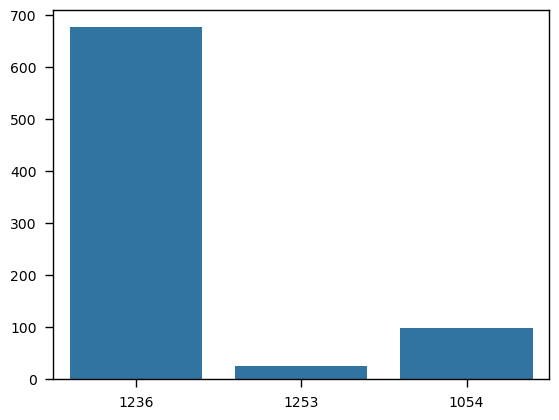

In [534]:
gene_oi = ['TFF1', 'TFF3'] 

dict_patient_to_exp = dict()
dict_patient_to_exp[ 1236 ] = list(df_TPM[(df_TPM['gene_name'].isin(gene_oi))]['1236'])[0]
dict_patient_to_exp[ 1253 ] = list(df_TPM[(df_TPM['gene_name'].isin(gene_oi))]['1253'])[0]
dict_patient_to_exp[ 1054 ] = list(df_TPM[(df_TPM['gene_name'].isin(gene_oi))]['1054'])[0]

sns.barplot(dict_patient_to_exp, order=[1236, 1253, 1054])

In [219]:
l = [0.42857142857142855, 0.6867517956903432, 1.0]
[e/min([abs(v) for v in l]) for e in l]

[1.0, 1.602420856610801, 2.3333333333333335]

In [220]:
l = [-0.6352717913669118, -1.0163851691635655, -1.242935562039464]
[abs(e)/min([abs(v) for v in l]) for e in l]

[1.0, 1.5999217704545223, 1.956541403113531]